In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# **LECTURA DE BASES**

In [ ]:
agro = pd.read_excel("/content/drive/MyDrive/Juan/BaseAgro.xlsx")
agro

,N° Area,Departamento,Ar-Ur,Ar-Ru-Ag,Ar-Ru-Di,TOTAL-Ar,Viv-Casa,Viv-Rancho,Viv-Casilla,Viv-Depto,Viv-Pieza,Viv-Pieza2,Viv-Local,Viv-Movil,Viv-Calle,TOTAL-Viv,CasaT-A,CasaT-B,TOTAL-CasaT,VIVIENDAS,PobUrbana,PobRural,TOTAL-Pob,Esc5-9,Esc10-14,Esc15-19,TOTAL-Esc,Pob_<29,Pob_>65,TOTAL-Pob.1,Educ1,Educ2,Educ3,Educ4,Educ5,Educ6,Educ7,Educ8,Educ9,TOTAL-Educ,...,Sin Luz,TOTAL-Luz,"H0,50","H0,51-0,99","H1-1,49","H1,50-1,99",H2-3,HMas3,TOTAL-H.1,ProcA1,ProcA2,ProcA3,ProcA4,ProcA5,ProcA6,TOTAL-Proc,CalSS1,CalSS2,CalSS3,TOTAL-Cal,BanoSI,BanoNO,TOTAL-Bano,ExclusivoSI,ExclusivoNO,TOTAL-Exclusivo,CadenaSI,CadenaNO,TOTAL-Cadena,Desag1,Desag2,Desag3,Desag4,TOTAL-Desag,Piso1,Piso2,Piso3,Piso4,TOTAL-Piso,HOGARES
0,7,Apóstoles,9220,413,1437,11070,9318,178,1236,214,93,8,9,1,2,11059,6856,2462,9318,11057,35213,7036,42249,4713,5143,4614,14470,25172,2902,42249,1607,7044,13569,3754,7026,1614,914,658,916,37102,...,578,11556,2585,1947,3401,1244,1853,526,11556,9232,870,64,1203,5,182,11556,536,5446,5574,11556,10952,604,11556,10522,430,10952,8351,2601,10952,561,5971,2846,1574,10952,6192,4361,828,175,11556,11556
1,14,Cainguás,7914,421,5689,14024,13233,355,150,77,147,1,32,3,2,14000,6508,6725,13233,13998,28969,24434,53403,6240,6748,5993,18981,32999,3421,53403,1854,9463,21980,2438,7155,1224,538,478,557,45687,...,1029,14387,2660,2388,4565,1745,2401,628,14387,7936,1332,156,3537,29,1397,14387,93,3869,10425,14387,13352,1035,14387,12784,568,13352,7533,5819,13352,101,4748,3968,4535,13352,10000,3871,290,226,14387,14387
2,21,Candelaria,4802,987,1130,6919,6435,155,264,3,29,0,12,5,1,6904,4127,2308,6435,6903,18762,8278,27040,3062,3251,3033,9346,16091,1721,27040,949,4360,9322,2363,4594,534,324,292,465,23203,...,388,7299,1341,1013,2234,870,1406,435,7299,5479,459,27,1176,12,146,7299,200,3303,3796,7299,6807,492,7299,6556,251,6807,4890,1917,6807,210,3775,1548,1274,6807,3293,3255,566,185,7299,7299
3,28,Capital,86931,319,1088,88338,71286,1440,2699,11442,1042,29,250,5,29,88222,59311,11610,70921,88193,319469,5287,324756,30542,33182,34016,97740,52429,4899,87853,11916,39445,75740,44007,65032,10635,9111,14397,20638,290921,...,499,92882,18968,16146,28444,10543,14876,3905,92882,85842,3982,279,2472,175,132,92882,40391,29811,22680,92882,89962,2920,92882,86420,3542,89962,80385,9577,89962,40654,32780,13564,2964,89962,65860,24242,1668,1112,92882,92939
4,35,Concepción,1684,134,742,2560,2206,218,107,0,6,0,3,12,0,2552,1395,811,2206,2552,6332,3245,9577,1165,1188,1068,3421,5769,713,9577,290,1889,3626,496,1278,301,118,66,104,8168,...,348,2584,584,417,746,295,415,127,2584,1759,358,8,309,4,146,2584,0,898,1686,2584,2386,198,2584,2290,96,2386,1609,777,2386,0,1060,769,557,2386,1075,1094,370,45,2584,2584
5,42,Eldorado,17285,1679,2161,21125,18729,336,729,867,365,8,49,8,2,21093,12936,5793,18729,21091,62951,15630,78581,7670,9038,8652,25360,17782,1894,28997,2375,11745,25671,6739,13972,1554,1523,1626,1971,67176,...,786,21651,4200,3504,7055,2548,3383,961,21651,18108,1258,69,1776,57,383,21651,626,11874,9151,21651,20625,1026,21651,19455,1170,20625,15751,4874,20625,954,12771,3205,3695,20625,16132,4670,407,442,21651,21661
6,49,General Manuel Belgrano,5536,661,4278,10475,8943,900,451,25,69,3,16,28,5,10440,4304,4639,8943,10435,21639,21263,42902,5406,5947,4841,16194,27973,1465,42902,1584,6210,19222,1982,4845,806,377,284,233,35543,...,1683,11042,1644,1727,3546,1535,2061,529,11042,3932,1186,162,5013,36,713,11042,271,1861,8910,11042,10056,986,11042,9621,435,10056,5197,4859,10056,286,3012,3005,3753,10056,8988,1174,357,523,11042,11042
7,56,Guaraní,7139,98,10173,17410,15848,558,624,179,120,1,49,3,2,17384,5947,9901,15848,17382,26133,41764,67897,8294,8986,7747,25027,43887,2787,67897,1959,11035,30499,2463,7423,1061,436,517,457,55850,...,1997,17789,2613,2718,6097,2449,3160,752,17789,5221,2368,249,8367,71,1513,17789,95,2724,14970,17789,15969,1820,17789,15389,580,15969,7391,8578,15969,109,4224,4457,7179,15969,13973,3015,342,459,17789,17789
8,63,Iguazú,19155,12,1574,20741,17418,652,1140,942,394,10,48,13,3,20620,11606,5812,17418

In [ ]:
regiones = pd.read_excel("/content/drive/MyDrive/Juan/MUNIS_Regiones.xlsx", sheet_name='Copia1')
regiones.head(50)

,Microrregion,Departamento
0,Alto Uruguay,25 de Mayo
1,Alto Parana,Eldorado
2,Centro,Leandro N. Alem
3,Sur,San Javier
4,Sur,Apóstoles
5,Centro,Cainguás
6,Nordeste,General Manuel Belgrano
7,Sur,Candelaria
8,Centro,Oberá
9,Oeste,Libertador General San Martín


In [ ]:
escolar = pd.read_excel("/content/drive/MyDrive/Ministerio del Agro/Bases/edad-escolar.xlsx")
escolar.head()

,N° Area,Departamento,Cat0,Cat1,Cat2,Cat3,Cat4,TotalCat,Lee,NoLee,TotalLee
0,7,Apóstoles,1037,470,8186,238,4010,13941,13235,1235,14470
1,14,Cainguás,1368,851,11384,232,4320,18155,17038,1943,18981
2,21,Candelaria,644,295,5528,142,2397,9006,8440,906,9346
3,28,Capital,7059,1577,50476,2007,31977,93096,90497,7243,97740
4,35,Concepción,212,182,2070,43,793,3300,3121,300,3421


In [ ]:
microrregiones = ['Alto Parana','Alto Uruguay','Centro','Nordeste','Sur']

# **DATOS**

### **Educacion Edad Escolar**

In [ ]:
escolar1 = escolar[['Departamento','Cat0','Cat1','Cat2','Cat3','Cat4','TotalCat']]
pobtotal = pd.DataFrame(agro[['Departamento','TOTAL-Pob']])
escolar1 = escolar1.merge(pobtotal, how='inner',on='Departamento')
escolar1

,Departamento,Cat0,Cat1,Cat2,Cat3,Cat4,TotalCat,TOTAL-Pob
0,Apóstoles,1037,470,8186,238,4010,13941,42249
1,Cainguás,1368,851,11384,232,4320,18155,53403
2,Candelaria,644,295,5528,142,2397,9006,27040
3,Capital,7059,1577,50476,2007,31977,93096,324756
4,Concepción,212,182,2070,43,793,3300,9577
5,Eldorado,1715,634,14562,309,6989,24209,78581
6,General Manuel Belgrano,1213,723,10492,167,2872,15467,42902
7,Guaraní,1499,1346,16009,254,4512,23620,67897
8,Iguazú,1938,780,15639,395,7170,25922,82227
9,Leandro N. Alem,1017,543,8287,208,3608,13663,45075


In [ ]:
escolar1 = escolar1.merge(regiones, how='left', on='Departamento')
cols = escolar1.columns.tolist()
cols = cols[-1:] + cols[:-1]
escolar1 = escolar1[cols]
columnas = ['Microrregion','Departamento','Inicial','Primario Completo','Primario Incompleto','Secundario Completo','Secundario Incompleto','Total','Poblacion']
escolar1.columns = columnas
escolar1['Inicial %'] = (escolar1['Inicial'] / escolar1['Poblacion']*100).round(2)
escolar1['Primario Completo %'] = (escolar1['Primario Completo']/escolar1['Total']*100).round(2)
escolar1['Primario Incompleto %'] = (escolar1['Primario Incompleto']/escolar1['Total']*100).round(2)
escolar1['Secundario Completo %'] = (escolar1['Secundario Completo']/escolar1['Total']*100).round(2)
escolar1['Secundario Incompleto %'] = (escolar1['Secundario Incompleto']/escolar1['Total']*100).round(2)
# escolar1 = escolar1.groupby('Microrregion', as_index=False).sum()
escolar1 = escolar1.set_index('Microrregion')
escolar1

,Departamento,Inicial,Primario Completo,Primario Incompleto,Secundario Completo,Secundario Incompleto,Total,Poblacion,Inicial %,Primario Completo %,Primario Incompleto %,Secundario Completo %,Secundario Incompleto %
Microrregion,,,,,,,,,,,,,
Sur,Apóstoles,1037,470,8186,238,4010,13941,42249,2.45,3.37,58.72,1.71,28.76
Centro,Cainguás,1368,851,11384,232,4320,18155,53403,2.56,4.69,62.70,1.28,23.80
Sur,Candelaria,644,295,5528,142,2397,9006,27040,2.38,3.28,61.38,1.58,26.62
Sur,Capital,7059,1577,50476,2007,31977,93096,324756,2.17,1.69,54.22,2.16,34.35
Sur,Concepción,212,182,2070,43,793,3300,9577,2.21,5.52,62.73,1.30,24.03
Alto Parana,Eldorado,1715,634,14562,309,6989,24209,78581,2.18,2.62,60.15,1.28,28.87
Nordeste,General Manuel Belgrano,1213,723,10492,167,2872,15467,42902,2.83,4.67,67.83,1.08,18.57
Alto Uruguay,Guaraní,1499,1346,16009,254,4512,23620,67897,2.21,5.70,67.78,1.08,19.10
Alto Parana,Iguazú,1938,780,15639,395,7170,25922,82227,2.36,3.01,60.33,1.52,27.66


In [ ]:
muestra1 = escolar1[['Total']].groupby('Microrregion',as_index=False).sum()
muestra1 = muestra1['Total'].tolist()
muestra1

[50131, 32937, 65566, 26943, 46397, 126273]

In [ ]:
lye = escolar[['Departamento','Lee','NoLee','TotalLee']]
pobtotal = pd.DataFrame(agro[['Departamento','TOTAL-Pob']])
lye = lye.merge(pobtotal, how='inner',on='Departamento')
lye

,Departamento,Lee,NoLee,TotalLee,TOTAL-Pob
0,Apóstoles,13235,1235,14470,42249
1,Cainguás,17038,1943,18981,53403
2,Candelaria,8440,906,9346,27040
3,Capital,90497,7243,97740,324756
4,Concepción,3121,300,3421,9577
5,Eldorado,23134,2226,25360,78581
6,General Manuel Belgrano,14235,1959,16194,42902
7,Guaraní,21875,3152,25027,67897
8,Iguazú,24860,2597,27457,82227
9,Leandro N. Alem,13121,1210,14331,45075


In [ ]:
lye = lye.merge(regiones, how='left', on='Departamento')
cols = lye.columns.tolist()
cols = cols[-1:] + cols[:-1]
lye = lye[cols]
columnas = ['Microrregion','Departamento','Sabe Leer y Escribir','No Sabe Leer y Escribir','Total','Poblacion']
lye.columns = columnas
# escolar2 = escolar2.groupby('Microrregion', as_index=False).sum()
lye['Sabe Leer y Escribir %'] = (lye['Sabe Leer y Escribir'] / lye['Poblacion']*100).round(2)
lye['No Sabe Leer y Escribir %'] = (lye['No Sabe Leer y Escribir']/lye['Poblacion']*100).round(2)
lye = lye.set_index('Microrregion')

In [ ]:
escolar2

,Microrregion,Inicial %,Primario Completo %,Primario Incompleto %,Secundario Completo %,Secundario Incompleto %,Sup No Universitario Completo %,Sup No Universitario Incompleto %,Universitario Completo %,Universitario Incompleto %
0,Alto Parana,3.82,17.13,38.10,10.77,20.98,2.53,2.16,2.17,2.33
1,Alto Uruguay,3.37,20.64,55.09,4.06,12.73,1.87,0.74,0.79,0.72
2,Centro,3.90,20.75,41.80,7.69,16.65,3.44,1.72,1.91,2.14
3,Nordeste,4.22,17.12,55.48,4.77,13.90,1.92,0.97,0.74,0.88
4,Oeste,3.59,19.25,40.49,8.72,19.66,3.13,1.82,1.67,1.65
5,Sur,3.98,19.16,38.43,9.98,18.58,3.29,1.92,1.92,2.74


### **Desagüe**

In [ ]:
df_desag = agro[['Departamento','Desag1','Desag2','Desag3','Desag4','TOTAL-Desag']]
pobtotal = pd.DataFrame(agro[['Departamento','TOTAL-Pob']])
df_desag = df_desag.merge(pobtotal, how='inner',on='Departamento')
df_desag

,Departamento,Desag1,Desag2,Desag3,Desag4,TOTAL-Desag,TOTAL-Pob
0,Apóstoles,561,5971,2846,1574,10952,42249
1,Cainguás,101,4748,3968,4535,13352,53403
2,Candelaria,210,3775,1548,1274,6807,27040
3,Capital,40654,32780,13564,2964,89962,324756
4,Concepción,0,1060,769,557,2386,9577
5,Eldorado,954,12771,3205,3695,20625,78581
6,General Manuel Belgrano,286,3012,3005,3753,10056,42902
7,Guaraní,109,4224,4457,7179,15969,67897
8,Iguazú,2258,9080,5424,2981,19743,82227
9,Leandro N. Alem,227,6582,2575,2747,12131,45075


In [ ]:
desague = df_desag.merge(regiones, how='left', on='Departamento')
cols = desague.columns.tolist()
cols = cols[-1:] + cols[:-1]
desague = desague[cols]
columnas = ['Microrregion','Departamento','Cloaca','Camara/Pozo','Pozo Ciego','Excavacion','Total','Poblacion']
desague.columns = columnas
# desague = desague.groupby('Microrregion', as_index=False).sum()
desague['Cloaca %'] = (desague['Cloaca'] / desague['Total'] * 100).round(2)
desague['Camara/Pozo %'] = (desague['Camara/Pozo'] / desague['Total'] * 100).round(2)
desague['Pozo Ciego %'] = (desague['Pozo Ciego'] / desague['Total'] * 100).round(2)
desague['Excavacion %'] = (desague['Excavacion'] / desague['Total'] * 100).round(2)
desague = desague.set_index('Microrregion')
desague

,Departamento,Cloaca,Camara/Pozo,Pozo Ciego,Excavacion,Total,Poblacion,Cloaca %,Camara/Pozo %,Pozo Ciego %,Excavacion %
Microrregion,,,,,,,,,,,
Sur,Apóstoles,561,5971,2846,1574,10952,42249,5.12,54.52,25.99,14.37
Centro,Cainguás,101,4748,3968,4535,13352,53403,0.76,35.56,29.72,33.96
Sur,Candelaria,210,3775,1548,1274,6807,27040,3.09,55.46,22.74,18.72
Sur,Capital,40654,32780,13564,2964,89962,324756,45.19,36.44,15.08,3.29
Sur,Concepción,0,1060,769,557,2386,9577,0.00,44.43,32.23,23.34
Alto Parana,Eldorado,954,12771,3205,3695,20625,78581,4.63,61.92,15.54,17.92
Nordeste,General Manuel Belgrano,286,3012,3005,3753,10056,42902,2.84,29.95,29.88,37.32
Alto Uruguay,Guaraní,109,4224,4457,7179,15969,67897,0.68,26.45,27.91,44.96
Alto Parana,Iguazú,2258,9080,5424,2981,19743,82227,11.44,45.99,27.47,15.10


In [ ]:
muestra2 = desague[['Total']].groupby('Microrregion',as_index=False).sum()
muestra2 = muestra2['Total'].tolist()
muestra2

[40368, 22860, 53914, 16909, 35553, 115393]

### **Tecnologia**

In [ ]:
df_pc = agro[['Departamento','PC-SI','PC-NO','TOTAL-PC']]
pobtotal = pd.DataFrame(agro[['Departamento','TOTAL-Pob']])
df_pc = df_pc.merge(pobtotal, how='inner',on='Departamento')
df_pc

df_cel = agro[['Departamento','Cel-SI','Cel-NO','TOTAL-Cel']]
pobtotal = pd.DataFrame(agro[['Departamento','TOTAL-Pob']])
df_cel = df_cel.merge(pobtotal, how='inner',on='Departamento')
df_cel


,Departamento,Cel-SI,Cel-NO,TOTAL-Cel,TOTAL-Pob
0,Apóstoles,9637,1919,11556,42249
1,Cainguás,11463,2924,14387,53403
2,Candelaria,6052,1247,7299,27040
3,Capital,82259,10623,92882,324756
4,Concepción,2018,566,2584,9577
5,Eldorado,17762,3889,21651,78581
6,General Manuel Belgrano,8172,2870,11042,42902
7,Guaraní,12849,4940,17789,67897
8,Iguazú,18226,3240,21466,82227
9,Leandro N. Alem,10488,2575,13063,45075


In [ ]:
pc = df_pc.merge(regiones, how='left', on='Departamento')
cols = pc.columns.tolist()
cols = cols[-1:] + cols[:-1]
pc = pc[cols]
columnas = ['Microrregion','Departamento','Posee PC','No Posee PC','Total','Poblacion']
pc.columns = columnas
pc['Posee PC %'] = (pc['Posee PC'] / pc['Total'] * 100).round(2)
pc['No Posee PC %'] = (pc['No Posee PC'] / pc['Total'] * 100).round(2)
pc = pc.set_index('Microrregion')
pc

,Departamento,Posee PC,No Posee PC,Total,Poblacion,Posee PC %,No Posee PC %
Microrregion,,,,,,,
Sur,Apóstoles,3027,8529,11556,42249,26.19,73.81
Centro,Cainguás,2201,12186,14387,53403,15.30,84.70
Sur,Candelaria,1430,5869,7299,27040,19.59,80.41
Sur,Capital,39095,53787,92882,324756,42.09,57.91
Sur,Concepción,436,2148,2584,9577,16.87,83.13
Alto Parana,Eldorado,5987,15664,21651,78581,27.65,72.35
Nordeste,General Manuel Belgrano,1670,9372,11042,42902,15.12,84.88
Alto Uruguay,Guaraní,2492,15297,17789,67897,14.01,85.99
Alto Parana,Iguazú,6658,14808,21466,82227,31.02,68.98


In [ ]:
muestra3 = pc[['Total']].groupby('Microrregion',as_index=False).sum()
muestra3 = muestra3['Total'].tolist()
muestra3

[43117, 25318, 57474, 18707, 38088, 120035]

In [ ]:
cel = df_cel.merge(regiones, how='left', on='Departamento')
cols = cel.columns.tolist()
cols = cols[-1:] + cols[:-1]
cel = cel[cols]
columnas = ['Microrregion','Departamento','Posee Cel','No Posee Cel','Total','Poblacion']
cel.columns = columnas
cel['Posee Cel %'] = (cel['Posee Cel'] / cel['Total'] * 100).round(2)
cel['No Posee Cel %'] = (cel['No Posee Cel'] / cel['Total'] * 100).round(2)
cel = cel.set_index('Microrregion')
cel

,Departamento,Posee Cel,No Posee Cel,Total,Poblacion,Posee Cel %,No Posee Cel %
Microrregion,,,,,,,
Sur,Apóstoles,9637,1919,11556,42249,83.39,16.61
Centro,Cainguás,11463,2924,14387,53403,79.68,20.32
Sur,Candelaria,6052,1247,7299,27040,82.92,17.08
Sur,Capital,82259,10623,92882,324756,88.56,11.44
Sur,Concepción,2018,566,2584,9577,78.10,21.90
Alto Parana,Eldorado,17762,3889,21651,78581,82.04,17.96
Nordeste,General Manuel Belgrano,8172,2870,11042,42902,74.01,25.99
Alto Uruguay,Guaraní,12849,4940,17789,67897,72.23,27.77
Alto Parana,Iguazú,18226,3240,21466,82227,84.91,15.09


In [ ]:
muestra4 = cel[['Total']].groupby('Microrregion',as_index=False).sum()
muestra4 = muestra4['Total'].tolist()
muestra4

[43117, 25318, 57474, 18707, 38088, 120035]

### **Educación**

In [ ]:
df_educ = agro[['Departamento','Educ1','Educ2','Educ3','Educ4','Educ5','Educ6','Educ7','Educ8','Educ9', 'TOTAL-Educ']]
pobtotal = pd.DataFrame(agro[['Departamento','TOTAL-Pob']])
df_educ = df_educ.merge(pobtotal, how='inner',on='Departamento')
df_educ

,Departamento,Educ1,Educ2,Educ3,Educ4,Educ5,Educ6,Educ7,Educ8,Educ9,TOTAL-Educ,TOTAL-Pob
0,Apóstoles,1607,7044,13569,3754,7026,1614,914,658,916,37102,42249
1,Cainguás,1854,9463,21980,2438,7155,1224,538,478,557,45687,53403
2,Candelaria,949,4360,9322,2363,4594,534,324,292,465,23203,27040
3,Capital,11916,39445,75740,44007,65032,10635,9111,14397,20638,290921,324756
4,Concepción,290,1889,3626,496,1278,301,118,66,104,8168,9577
5,Eldorado,2375,11745,25671,6739,13972,1554,1523,1626,1971,67176,78581
6,General Manuel Belgrano,1584,6210,19222,1982,4845,806,377,284,233,35543,42902
7,Guaraní,1959,11035,30499,2463,7423,1061,436,517,457,55850,67897
8,Iguazú,2796,11476,25963,7871,14466,1879,1411,1314,1180,68356,82227
9,Leandro N. Alem,1445,8641,15479,3583,6694,1612,763,838,781,39836,45075


In [ ]:
educacion = df_educ.merge(regiones, how='left', on='Departamento')
cols = educacion.columns.tolist()
cols = cols[-1:] + cols[:-1]
educacion = educacion[cols]
columnas = ['Microrregion','Departamento','Inicial','Primario Completo','Primario Incompleto',
            'Secundario Completo','Secundario Incompleto','Sup No Universitario Completo','Sup No Universitario Incompleto',
            'Universitario Completo','Universitario Incompleto','Total Niveles','Poblacion']
educacion.columns = columnas
educacion['Inicial %'] = (educacion['Inicial'] / educacion['Total Niveles'] * 100).round(2)
educacion['Primario Completo %'] = (educacion['Primario Completo'] / educacion['Total Niveles'] * 100).round(2)
educacion['Primario Incompleto %'] = (educacion['Primario Incompleto'] / educacion['Total Niveles'] * 100).round(2)
educacion['Secundario Completo %'] = (educacion['Secundario Completo'] / educacion['Total Niveles'] * 100).round(2)
educacion['Secundario Incompleto %'] = (educacion['Secundario Incompleto'] / educacion['Total Niveles'] * 100).round(2)
educacion['Sup No Universitario Completo %'] = (educacion['Sup No Universitario Completo'] / educacion['Total Niveles'] * 100).round(2)
educacion['Sup No Universitario Incompleto %'] = (educacion['Sup No Universitario Incompleto'] / educacion['Total Niveles'] * 100).round(2)
educacion['Universitario Completo %'] = (educacion['Universitario Completo'] / educacion['Total Niveles'] * 100).round(2)
educacion['Universitario Incompleto %'] = (educacion['Universitario Incompleto'] / educacion['Total Niveles'] * 100).round(2)
educacion = educacion.set_index('Microrregion')
educacion

,Departamento,Inicial,Primario Completo,Primario Incompleto,Secundario Completo,Secundario Incompleto,Sup No Universitario Completo,Sup No Universitario Incompleto,Universitario Completo,Universitario Incompleto,Total Niveles,Poblacion,Inicial %,Primario Completo %,Primario Incompleto %,Secundario Completo %,Secundario Incompleto %,Sup No Universitario Completo %,Sup No Universitario Incompleto %,Universitario Completo %,Universitario Incompleto %
Microrregion,,,,,,,,,,,,,,,,,,,,,
Sur,Apóstoles,1607,7044,13569,3754,7026,1614,914,658,916,37102,42249,4.33,18.99,36.57,10.12,18.94,4.35,2.46,1.77,2.47
Centro,Cainguás,1854,9463,21980,2438,7155,1224,538,478,557,45687,53403,4.06,20.71,48.11,5.34,15.66,2.68,1.18,1.05,1.22
Sur,Candelaria,949,4360,9322,2363,4594,534,324,292,465,23203,27040,4.09,18.79,40.18,10.18,19.80,2.30,1.40,1.26,2.00
Sur,Capital,11916,39445,75740,44007,65032,10635,9111,14397,20638,290921,324756,4.10,13.56,26.03,15.13,22.35,3.66,3.13,4.95,7.09
Sur,Concepción,290,1889,3626,496,1278,301,118,66,104,8168,9577,3.55,23.13,44.39,6.07,15.65,3.69,1.44,0.81,1.27
Alto Parana,Eldorado,2375,11745,25671,6739,13972,1554,1523,1626,1971,67176,78581,3.54,17.48,38.21,10.03,20.80,2.31,2.27,2.42,2.93
Nordeste,General Manuel Belgrano,1584,6210,19222,1982,4845,806,377,284,233,35543,42902,4.46,17.47,54.08,5.58,13.63,2.27,1.06,0.80,0.66
Alto Uruguay,Guaraní,1959,11035,30499,2463,7423,1061,436,517,457,55850,67897,3.51,19.76,54.61,4.41,13.29,1.90,0.78,0.93,0.82
Alto Parana,Iguazú,2796,11476,25963,7871,14466,1879,1411,1314,1180,68356,82227,4.09,16.79,37.98,11.51,21.16,2.75,2.06,1.92,1.73


In [ ]:
muestra5 = educacion[['Total Niveles']].groupby('Microrregion',as_index=False).sum()
muestra5 = muestra5['Total Niveles'].tolist()
muestra5

[135532, 79520, 179359, 60795, 121715, 377270]

### **Luz**

In [ ]:
df_luz = agro[['Departamento','Luz-Red','Luz-Motor','Luz-Otro','Sin Luz','TOTAL-Luz']]
pobtotal = pd.DataFrame(agro[['Departamento','TOTAL-Pob']])
df_luz = df_luz.merge(pobtotal, how='inner',on='Departamento')
df_luz

,Departamento,Luz-Red,Luz-Motor,Luz-Otro,Sin Luz,TOTAL-Luz,TOTAL-Pob
0,Apóstoles,10922,25,31,578,11556,42249
1,Cainguás,13287,17,54,1029,14387,53403
2,Candelaria,6862,9,40,388,7299,27040
3,Capital,91667,112,604,499,92882,324756
4,Concepción,2227,2,7,348,2584,9577
5,Eldorado,20743,22,100,786,21651,78581
6,General Manuel Belgrano,9239,29,91,1683,11042,42902
7,Guaraní,15677,39,76,1997,17789,67897
8,Iguazú,20205,44,385,832,21466,82227
9,Leandro N. Alem,12021,19,30,993,13063,45075


In [ ]:
luz = df_luz.merge(regiones, how='left', on='Departamento')
cols = luz.columns.tolist()
cols = cols[-1:] + cols[:-1]
luz = luz[cols]
columnas = ['Microrregion','Departamento','Red Electrica','Generador','Otro','Sin Luz','Total','Poblacion']
luz.columns = columnas
luz['Red Electrica %'] = (luz['Red Electrica'] / luz['Total'] * 100).round(2)
luz['Generador %'] = (luz['Generador'] / luz['Total'] * 100).round(2)
luz['Otro %'] = (luz['Otro'] / luz['Total'] * 100).round(2)
luz['Sin Luz %'] = (luz['Sin Luz'] / luz['Total'] * 100).round(2)
luz = luz.set_index('Microrregion')
luz

,Departamento,Red Electrica,Generador,Otro,Sin Luz,Total,Poblacion,Red Electrica %,Generador %,Otro %,Sin Luz %
Microrregion,,,,,,,,,,,
Sur,Apóstoles,10922,25,31,578,11556,42249,94.51,0.22,0.27,5.00
Centro,Cainguás,13287,17,54,1029,14387,53403,92.35,0.12,0.38,7.15
Sur,Candelaria,6862,9,40,388,7299,27040,94.01,0.12,0.55,5.32
Sur,Capital,91667,112,604,499,92882,324756,98.69,0.12,0.65,0.54
Sur,Concepción,2227,2,7,348,2584,9577,86.18,0.08,0.27,13.47
Alto Parana,Eldorado,20743,22,100,786,21651,78581,95.81,0.10,0.46,3.63
Nordeste,General Manuel Belgrano,9239,29,91,1683,11042,42902,83.67,0.26,0.82,15.24
Alto Uruguay,Guaraní,15677,39,76,1997,17789,67897,88.13,0.22,0.43,11.23
Alto Parana,Iguazú,20205,44,385,832,21466,82227,94.13,0.20,1.79,3.88


In [ ]:
muestra6 = luz[['Total']].groupby('Microrregion',as_index=False).sum()
muestra6 = muestra6['Total'].tolist()
muestra6

[43117, 25318, 57474, 18707, 38088, 120035]

### **Edad**

In [ ]:
df_edad = agro[['Departamento','Pob_<29','Pob_>65','TOTAL-Pob']]

In [ ]:
edad = df_edad.merge(regiones, how='left', on='Departamento')
cols = edad.columns.tolist()
cols = cols[-1:] + cols[:-1]
edad = edad[cols]
columnas = ['Microrregion','Departamento','Hasta 29','65 o más','Total'] 
edad.columns = columnas
edad['Hasta 29 %'] = (edad['Hasta 29'] / edad['Total'] * 100).round(2)
edad['65 o más %'] = (edad['65 o más'] / edad['Total'] * 100).round(2)
edad = edad.set_index('Microrregion')
edad

,Departamento,Hasta 29,65 o más,Total,Hasta 29 %,65 o más %
Microrregion,,,,,,
Sur,Apóstoles,25172,2902,42249,59.58,6.87
Centro,Cainguás,32999,3421,53403,61.79,6.41
Sur,Candelaria,16091,1721,27040,59.51,6.36
Sur,Capital,52429,4899,324756,16.14,1.51
Sur,Concepción,5769,713,9577,60.24,7.44
Alto Parana,Eldorado,17782,1894,78581,22.63,2.41
Nordeste,General Manuel Belgrano,27973,1465,42902,65.20,3.41
Alto Uruguay,Guaraní,43887,2787,67897,64.64,4.10
Alto Parana,Iguazú,49903,3814,82227,60.69,4.64


In [ ]:
muestra7 = edad[['Total']].groupby('Microrregion',as_index=False).sum()
muestra7 = muestra7['Total'].tolist()
muestra7

[160808, 95651, 205979, 73953, 141034, 424528]

## **Empleos**

### **Categoría Ocupacional**

In [ ]:
df_cat = agro[['Departamento','Cat-Obrero','Cat-Patron','Cat-Cuentaprop','Cat-Familiar','TOTAL-Cat']]
pobtotal = pd.DataFrame(agro[['Departamento','TOTAL-Pob']])
df_cat = df_cat.merge(pobtotal, how='inner',on='Departamento')
df_cat

,Departamento,Cat-Obrero,Cat-Patron,Cat-Cuentaprop,Cat-Familiar,TOTAL-Cat,TOTAL-Pob
0,Apóstoles,6607,156,5760,2466,14989,42249
1,Cainguás,9194,275,5260,4677,19406,53403
2,Candelaria,5416,133,2153,1088,8790,27040
3,Capital,92653,7699,29884,6225,136461,324756
4,Concepción,2016,58,617,300,2991,9577
5,Eldorado,18590,1088,5895,1689,27262,78581
6,General Manuel Belgrano,7220,216,4573,3354,15363,42902
7,Guaraní,9537,933,9269,6099,25838,67897
8,Iguazú,20625,1584,6452,1838,30499,82227
9,Leandro N. Alem,10143,1445,4012,1716,17316,45075


In [ ]:
catocup = df_cat.merge(regiones, how='left', on='Departamento')
cols = catocup.columns.tolist()
cols = cols[-1:]+cols[:-1]
catocup = catocup[cols]
columnas = ['Microrregion','Departamento','Obrero','Patron','Cuentapropista','Trabajador Familiar','Total','Poblacion']
catocup.columns = columnas
catocup['Obrero %'] = (catocup['Obrero']/catocup['Total']*100).round(2)
catocup['Patron %'] = (catocup['Patron']/catocup['Total']*100).round(2)
catocup['Cuentapropista %'] = (catocup['Cuentapropista']/catocup['Total']*100).round(2)
catocup['Trabajador Familiar %'] = (catocup['Trabajador Familiar']/catocup['Total']*100).round(2)
catocup = catocup.set_index('Microrregion')
catocup.head()

,Departamento,Obrero,Patron,Cuentapropista,Trabajador Familiar,Total,Poblacion,Obrero %,Patron %,Cuentapropista %,Trabajador Familiar %
Microrregion,,,,,,,,,,,
Sur,Apóstoles,6607,156,5760,2466,14989,42249,44.08,1.04,38.43,16.45
Centro,Cainguás,9194,275,5260,4677,19406,53403,47.38,1.42,27.11,24.10
Sur,Candelaria,5416,133,2153,1088,8790,27040,61.62,1.51,24.49,12.38
Sur,Capital,92653,7699,29884,6225,136461,324756,67.90,5.64,21.90,4.56
Sur,Concepción,2016,58,617,300,2991,9577,67.40,1.94,20.63,10.03


In [ ]:
muestra8 = catocup[['Total']].groupby('Microrregion',as_index=False).sum()
muestra8 = muestra8['Total'].tolist()
muestra8

[57761, 36594, 77418, 25687, 48094, 170762]

### **Condición de Actividad**

In [ ]:
df_cond = agro[['Departamento','Cond-Ocup','Cond-Desoc','Cond-Inact','TOTAL-Cond']]
pobtotal = pd.DataFrame(agro[['Departamento','TOTAL-Pob']])
df_cond = df_cond.merge(pobtotal, how='inner',on='Departamento')
df_cond

,Departamento,Cond-Ocup,Cond-Desoc,Cond-Inact,TOTAL-Cond,TOTAL-Pob
0,Apóstoles,14989,836,13085,28910,42249
1,Cainguás,19406,727,15563,35696,53403
2,Candelaria,8790,521,8800,18111,27040
3,Capital,136461,9294,90326,236081,324756
4,Concepción,2991,136,3285,6412,9577
5,Eldorado,27262,2341,25003,54606,78581
6,General Manuel Belgrano,15363,470,11525,27358,42902
7,Guaraní,25838,536,17668,44042,67897
8,Iguazú,30499,1838,22066,54403,82227
9,Leandro N. Alem,17316,704,14051,32071,45075


In [ ]:
condicion = df_cond.merge(regiones, how='left', on='Departamento')
cols = condicion.columns.tolist()
cols = cols[-1:]+cols[:-1]
condicion = condicion[cols]
columnas = ['Microrregion','Departamento','Ocupado','Desocupado','Inactivo','Total','Poblacion']
condicion.columns = columnas
condicion['Ocupado %'] = (condicion['Ocupado']/condicion['Total']*100).round(2)
condicion['Desocupado %'] = (condicion['Desocupado']/condicion['Total']*100).round(2)
condicion['Inactivo %'] = (condicion['Inactivo']/condicion['Total']*100).round(2)
condicion = condicion.set_index('Microrregion')
condicion

,Departamento,Ocupado,Desocupado,Inactivo,Total,Poblacion,Ocupado %,Desocupado %,Inactivo %
Microrregion,,,,,,,,,
Sur,Apóstoles,14989,836,13085,28910,42249,51.85,2.89,45.26
Centro,Cainguás,19406,727,15563,35696,53403,54.36,2.04,43.60
Sur,Candelaria,8790,521,8800,18111,27040,48.53,2.88,48.59
Sur,Capital,136461,9294,90326,236081,324756,57.80,3.94,38.26
Sur,Concepción,2991,136,3285,6412,9577,46.65,2.12,51.23
Alto Parana,Eldorado,27262,2341,25003,54606,78581,49.92,4.29,45.79
Nordeste,General Manuel Belgrano,15363,470,11525,27358,42902,56.16,1.72,42.13
Alto Uruguay,Guaraní,25838,536,17668,44042,67897,58.67,1.22,40.12
Alto Parana,Iguazú,30499,1838,22066,54403,82227,56.06,3.38,40.56


In [ ]:
muestra9 = condicion[['Total']].groupby('Microrregion',as_index=False).sum()
muestra9 = muestra9['Total'].tolist()
muestra9

[109009, 62782, 142078, 46841, 96880, 303606]

### **Carácter Ocupacional**

In [ ]:
df_carac = agro[['Departamento','Carac1','Carac2','Carac3','Carac4','TOTAL-Carac']]
pobtotal = pd.DataFrame(agro[['Departamento','TOTAL-Pob']])
df_carac = df_carac.merge(pobtotal, how='inner',on='Departamento')
df_carac

,Departamento,Carac1,Carac2,Carac3,Carac4,TOTAL-Carac,TOTAL-Pob
0,Apóstoles,2387,293,7,7,14989,42249
1,Cainguás,7411,341,3,14,19406,53403
2,Candelaria,2021,200,9,18,8790,27040
3,Capital,8354,1588,33,85,136461,324756
4,Concepción,811,148,1,1,2991,9577
5,Eldorado,3465,624,3,6,27262,78581
6,General Manuel Belgrano,6457,472,0,10,15363,42902
7,Guaraní,11348,361,6,15,25838,67897
8,Iguazú,1861,598,2,49,30499,82227
9,Leandro N. Alem,3091,240,4,2,17316,45075


In [ ]:
caracter = df_carac.merge(regiones,how='left',on='Departamento')
cols = caracter.columns.tolist()
cols = cols[-1:]+cols[:-1]
caracter = caracter[cols]
columnas = ['Microrregion','Departamento','Agricola','Actividades Primarias','Pesquera','Extractiva','Total','Poblacion']
caracter.columns = columnas
caracter['Agricola %'] = (caracter['Agricola']/caracter['Total']*100).round(2)
caracter['Actividades Primarias %'] = (caracter['Actividades Primarias']/caracter['Total']*100).round(2)
caracter['Pesquera %'] = (caracter['Pesquera']/caracter['Total']*100).round(2)
caracter['Extractiva %'] = (caracter['Extractiva']/caracter['Total']*100).round(2)
caracter = caracter.set_index('Microrregion')
caracter

,Departamento,Agricola,Actividades Primarias,Pesquera,Extractiva,Total,Poblacion,Agricola %,Actividades Primarias %,Pesquera %,Extractiva %
Microrregion,,,,,,,,,,,
Sur,Apóstoles,2387,293,7,7,14989,42249,15.93,1.95,0.05,0.05
Centro,Cainguás,7411,341,3,14,19406,53403,38.19,1.76,0.02,0.07
Sur,Candelaria,2021,200,9,18,8790,27040,22.99,2.28,0.10,0.20
Sur,Capital,8354,1588,33,85,136461,324756,6.12,1.16,0.02,0.06
Sur,Concepción,811,148,1,1,2991,9577,27.11,4.95,0.03,0.03
Alto Parana,Eldorado,3465,624,3,6,27262,78581,12.71,2.29,0.01,0.02
Nordeste,General Manuel Belgrano,6457,472,0,10,15363,42902,42.03,3.07,0.00,0.07
Alto Uruguay,Guaraní,11348,361,6,15,25838,67897,43.92,1.40,0.02,0.06
Alto Parana,Iguazú,1861,598,2,49,30499,82227,6.10,1.96,0.01,0.16


In [ ]:
muestra10 = caracter[['Total']].groupby('Microrregion',as_index=False).sum()
muestra10 = muestra10['Total'].tolist()
muestra10

[57761, 36594, 77418, 25687, 48094, 170762]

### **Sector en el que trabaja**

In [ ]:
df_sector = agro[['Departamento','Sec-Nac','Sec-Prov','Sec-Mun','Sec-Priv','TOTAL-Sec']]
pobtotal = pd.DataFrame(agro[['Departamento','TOTAL-Pob']])
df_sector = df_sector.merge(pobtotal, how='inner',on='Departamento')
df_sector

,Departamento,Sec-Nac,Sec-Prov,Sec-Mun,Sec-Priv,TOTAL-Sec,TOTAL-Pob
0,Apóstoles,405,1236,345,4621,6607,42249
1,Cainguás,198,1605,552,6839,9194,53403
2,Candelaria,318,1417,377,3304,5416,27040
3,Capital,6528,24210,4520,57395,92653,324756
4,Concepción,167,419,106,1324,2016,9577
5,Eldorado,876,2974,1038,13702,18590,78581
6,General Manuel Belgrano,445,1346,314,5115,7220,42902
7,Guaraní,234,1688,493,7122,9537,67897
8,Iguazú,1479,2184,1263,15699,20625,82227
9,Leandro N. Alem,326,2005,522,7290,10143,45075


In [ ]:
sector = df_sector.merge(regiones,how='left',on='Departamento')
cols = sector.columns.tolist()
cols = cols[-1:]+cols[:-1]
sector = sector[cols]
columnas = ['Microrregion','Departamento','Sector Nacional','Sector Provincial','Sector Municipal','Sector Privado','Total','Poblacion']
sector.columns = columnas
sector['Sector Nacional %'] = (sector['Sector Nacional']/sector['Total']*100).round(2)
sector['Sector Provincial %'] = (sector['Sector Provincial']/sector['Total']*100).round(2)
sector['Sector Municipal %'] = (sector['Sector Municipal']/sector['Total']*100).round(2)
sector['Sector Privado %'] = (sector['Sector Privado']/sector['Total']*100).round(2)
sector['Sector Publico'] = (sector['Sector Municipal']+sector['Sector Provincial']+sector['Sector Nacional'])
sector['Sector Publico %'] = (sector['Sector Publico']/sector['Total']*100).round(2)
sector['% Nacional/Publico'] = (sector['Sector Nacional']/sector['Sector Publico']*100).round(2)
sector['% Provincial/Publico'] = (sector['Sector Provincial']/sector['Sector Publico']*100).round(2)
sector['% Municipal/Publico'] = (sector['Sector Municipal']/sector['Sector Publico']*100).round(2)
sector = sector.set_index('Microrregion')
sector

,Departamento,Sector Nacional,Sector Provincial,Sector Municipal,Sector Privado,Total,Poblacion,Sector Nacional %,Sector Provincial %,Sector Municipal %,Sector Privado %,Sector Publico,Sector Publico %,% Nacional/Publico,% Provincial/Publico,% Municipal/Publico
Microrregion,,,,,,,,,,,,,,,,
Sur,Apóstoles,405,1236,345,4621,6607,42249,6.13,18.71,5.22,69.94,1986,30.06,20.39,62.24,17.37
Centro,Cainguás,198,1605,552,6839,9194,53403,2.15,17.46,6.00,74.39,2355,25.61,8.41,68.15,23.44
Sur,Candelaria,318,1417,377,3304,5416,27040,5.87,26.16,6.96,61.00,2112,39.00,15.06,67.09,17.85
Sur,Capital,6528,24210,4520,57395,92653,324756,7.05,26.13,4.88,61.95,35258,38.05,18.51,68.67,12.82
Sur,Concepción,167,419,106,1324,2016,9577,8.28,20.78,5.26,65.67,692,34.33,24.13,60.55,15.32
Alto Parana,Eldorado,876,2974,1038,13702,18590,78581,4.71,16.00,5.58,73.71,4888,26.29,17.92,60.84,21.24
Nordeste,General Manuel Belgrano,445,1346,314,5115,7220,42902,6.16,18.64,4.35,70.84,2105,29.16,21.14,63.94,14.92
Alto Uruguay,Guaraní,234,1688,493,7122,9537,67897,2.45,17.70,5.17,74.68,2415,25.32,9.69,69.90,20.41
Alto Parana,Iguazú,1479,2184,1263,15699,20625,82227,7.17,10.59,6.12,76.12,4926,23.88,30.02,44.34,25.64


In [ ]:
muestra11= sector[['Total']].groupby('Microrregion',as_index=False).sum()
muestra11 = muestra11['Total'].tolist()
muestra11

[39215, 13276, 44923, 10994, 31086, 110708]

# **TABLAS INDIVIDUALES**

### **Desagüe**

In [ ]:
cloaca = pd.DataFrame(desague[['Cloaca %']]).groupby('Microrregion').mean().round(2)
cloaca['Poblacion'] = muestra2
cloaca

,Cloaca %,Poblacion
Microrregion,,
Alto Parana,8.04,40368
Alto Uruguay,0.76,22860
Centro,9.14,53914
Nordeste,1.42,16909
Oeste,10.54,35553
Sur,11.44,115393


In [ ]:
cam_pozo = pd.DataFrame(desague[['Camara/Pozo %']]).groupby('Microrregion').mean().round(2)
cam_pozo['Poblacion'] = muestra2
cam_pozo

,Camara/Pozo %,Poblacion
Microrregion,,
Alto Parana,53.96,40368
Alto Uruguay,25.58,22860
Centro,39.97,53914
Nordeste,28.56,16909
Oeste,48.44,35553
Sur,47.00,115393


In [ ]:
pciego = pd.DataFrame(desague[['Pozo Ciego %']]).groupby('Microrregion').mean().round(2)
pciego['Poblacion'] = muestra2
pciego

,Pozo Ciego %,Poblacion
Microrregion,,
Alto Parana,21.50,40368
Alto Uruguay,30.50,22860
Centro,24.84,53914
Nordeste,29.18,16909
Oeste,20.65,35553
Sur,23.88,115393


In [ ]:
excavacion = pd.DataFrame(desague[['Excavacion %']]).groupby('Microrregion').mean().round(2)
excavacion['Poblacion'] = muestra2
excavacion

,Excavacion %,Poblacion
Microrregion,,
Alto Parana,16.51,40368
Alto Uruguay,43.16,22860
Centro,26.05,53914
Nordeste,40.84,16909
Oeste,20.38,35553
Sur,17.69,115393


In [ ]:
tdesague = pd.DataFrame(desague[['Cloaca %','Camara/Pozo %','Pozo Ciego %','Excavacion %']]).groupby('Microrregion').mean().round(2)
tdesague['Poblacion'] = muestra2
tdesague

,Cloaca %,Camara/Pozo %,Pozo Ciego %,Excavacion %,Poblacion
Microrregion,,,,,
Alto Parana,8.04,53.96,21.50,16.51,40368
Alto Uruguay,0.76,25.58,30.50,43.16,22860
Centro,9.14,39.97,24.84,26.05,53914
Nordeste,1.42,28.56,29.18,40.84,16909
Oeste,10.54,48.44,20.65,20.38,35553
Sur,11.44,47.00,23.88,17.69,115393


En tabla se visualizan los distintos desagües de inodoro separados por microrregion. Se observa que la Microrregion Sur es la que presenta la mayor cantidad de hogares con desagüe a cloacas de las microrregiones y aproximadamente un 39,79% de hogares cuyos desagües son hacia cámaras sépticas o pozos ciegos, mientras que la Microrregión Alto Uruguay presenta menos del 1% de los hogares con acceso a cloacas y la mayor parte de los mismos cuenta con desagüe hacia excavaciones en la tierra.

Si comparamos el caso de las Microrregiones Alto Parana, Centro y Oeste, el promedio de hogares que cuentan con desagüe a cloacas se encuentra alrededor del 11,5% aproximadamente. Sin embargo, la diferencia entre las mencionadas Microrregiones aumenta al comparar las distintas alternativas de desagüe, donde el Centro presenta mayor precariedad al contar con la mayor proporción de hogares con desagüe a excavaciones con respecto al Alto Parana y Oeste.

### **Tecnologia**

In [ ]:
pcsi = pd.DataFrame(pc[['Posee PC %']]).groupby('Microrregion').mean().round(2)
pcsi['Poblacion'] = muestra3
pcsi

,Posee PC %,Poblacion
Microrregion,,
Alto Parana,29.34,43117
Alto Uruguay,13.11,25318
Centro,22.42,57474
Nordeste,13.30,18707
Oeste,23.39,38088
Sur,24.55,120035


In [ ]:
pcno = pd.DataFrame(pc[['No Posee PC %']]).groupby('Microrregion').mean().round(2)
pcno['Poblacion'] = muestra3
pcno

,No Posee PC %,Poblacion
Microrregion,,
Alto Parana,70.66,43117
Alto Uruguay,86.89,25318
Centro,77.58,57474
Nordeste,86.70,18707
Oeste,76.61,38088
Sur,75.45,120035


In [ ]:
pctotal = pd.DataFrame(pc[['Posee PC %','No Posee PC %']]).groupby('Microrregion').mean().round(2)
pctotal['Poblacion'] = muestra3
esctotal.to_excel('/content/drive/MyDrive/Ministerio del Agro/Tablas/Posesion PC.xlsx')
pctotal

,Posee PC %,No Posee PC %,Poblacion
Microrregion,,,
Alto Parana,29.34,70.66,43117
Alto Uruguay,13.11,86.89,25318
Centro,22.42,77.58,57474
Nordeste,13.30,86.70,18707
Oeste,23.39,76.61,38088
Sur,24.55,75.45,120035


Se observa que en todas las Microrregiones, la cantidad de hogares que no cuentan con acceso a una PC superan el 60% en todos los casos. En el caso del Alto Uruguay y el Nordeste los casos ascienden a más del 85%.
Se visualiza que la Microrregión Sur es la que cuenta con mayor proporción de acceso a una PC por hogar con respecto a las otras Microrregiones.

In [ ]:
pcycel = pd.DataFrame()
pcycel['Poseen PC'] = pc['Posee PC %']
pcycel['No Poseen PC'] = pc['No Posee PC %']
pcycel['Poseen Cel'] = cel['Posee Cel %']
pcycel['No Poseen Cel'] = cel['No Posee Cel %']
pcycel = pcycel.groupby('Microrregion').mean().round(2)
pcycel['Poblacion'] = muestra3
pcycel.to_excel('/content/drive/MyDrive/Ministerio del Agro/Tablas/Posesion PC y Cel.xlsx')

In [ ]:
celsi = pd.DataFrame(cel[['Posee Cel %']]).groupby('Microrregion').mean().round(2)
celsi['Poblacion'] = muestra4
celsi

,Posee Cel %,Poblacion
Microrregion,,
Alto Parana,83.48,43117
Alto Uruguay,74.66,25318
Centro,80.83,57474
Nordeste,72.46,18707
Oeste,81.50,38088
Sur,82.22,120035


In [ ]:
celno = pd.DataFrame(cel[['No Posee Cel %']]).groupby('Microrregion').mean().round(2)
celno['Poblacion'] = muestra4
celno

,No Posee Cel %,Poblacion
Microrregion,,
Alto Parana,16.52,43117
Alto Uruguay,25.34,25318
Centro,19.17,57474
Nordeste,27.53,18707
Oeste,18.50,38088
Sur,17.78,120035


In [ ]:
celtotal = pd.DataFrame(cel[['Posee Cel %','No Posee Cel %']]).groupby('Microrregion').mean().round(2)
celtotal['Poblacion'] = muestra4
celtotal

,Posee Cel %,No Posee Cel %,Poblacion
Microrregion,,,
Alto Parana,83.48,16.52,43117
Alto Uruguay,74.66,25.34,25318
Centro,80.83,19.17,57474
Nordeste,72.46,27.53,18707
Oeste,81.50,18.50,38088
Sur,82.22,17.78,120035


Al contrario de lo ocurrido en el análisis de hogares con acceso a una PC, se puede ver que en todas las Microrregiones es mayor la cantidad de hogares que cuentan con acceso a un Celular, los cuales representan más del 70% en todos los casos, que los que no lo tienen. Sin embargo, cabe señalar que las dos Microrregiones en la que existen menos celulares por hogar son Nordeste y Alto Uruguay, lo cual coincide con la cantidad de Hogares con acceso a una PC, donde también se tratan de las dos Microrregiones con menor acceso a las mismas.

### **Educacion**

In [ ]:
inicial = pd.DataFrame(educacion[['Inicial %']]).groupby('Microrregion').mean().round(2)
inicial['Poblacion'] = muestra5
inicial

,Inicial %,Poblacion
Microrregion,,
Alto Parana,3.82,135532
Alto Uruguay,3.37,79520
Centro,3.90,179359
Nordeste,4.22,60795
Oeste,3.59,121715
Sur,3.98,377270


In [ ]:
pcompleto = pd.DataFrame(educacion[['Primario Completo %']]).groupby('Microrregion').mean().round(2)
pcompleto['Poblacion'] = muestra5
pcompleto

,Primario Completo %,Poblacion
Microrregion,,
Alto Parana,17.13,135532
Alto Uruguay,20.64,79520
Centro,20.75,179359
Nordeste,17.12,60795
Oeste,19.25,121715
Sur,19.16,377270


In [ ]:
pincompleto = pd.DataFrame(educacion[['Primario Incompleto %']]).groupby('Microrregion').mean().round(2)
pincompleto['Poblacion'] = muestra5
pincompleto

,Primario Incompleto %,Poblacion
Microrregion,,
Alto Parana,38.10,135532
Alto Uruguay,55.09,79520
Centro,41.80,179359
Nordeste,55.48,60795
Oeste,40.49,121715
Sur,38.43,377270


In [ ]:
ptotal = pd.DataFrame(educacion[['Primario Completo %','Primario Incompleto %']]).groupby('Microrregion').mean().round(2)
ptotal['Poblacion'] = muestra5
ptotal

,Primario Completo %,Primario Incompleto %,Poblacion
Microrregion,,,
Alto Parana,17.13,38.10,135532
Alto Uruguay,20.64,55.09,79520
Centro,20.75,41.80,179359
Nordeste,17.12,55.48,60795
Oeste,19.25,40.49,121715
Sur,19.16,38.43,377270


Se visualiza que tanto la Microrregión Alto Uruguay como Nordeste cuentan con aproximadamente un 55% de población que no han finalizado la educación Primaria, mientras que la región que presenta una menor proporción de individuos con nivel Primario Incompleto es la Microrregión Sur.

Por otro lado, las Microrregiones Alto Uruguay, Centro y Oeste son las que cuentan con la mayor proporción de invidiuos cuyo nivel educativo máximo finalizado es el nivel Primario, con aproximadamente un 20% de la población en cada caso.

In [ ]:
scompleto = pd.DataFrame(educacion[['Secundario Completo %']]).groupby('Microrregion').mean().round(2)
scompleto['Poblacion'] = muestra5
scompleto

,Secundario Completo %,Poblacion
Microrregion,,
Alto Parana,10.77,135532
Alto Uruguay,4.06,79520
Centro,7.69,179359
Nordeste,4.77,60795
Oeste,8.72,121715
Sur,9.98,377270


In [ ]:
sincompleto = pd.DataFrame(educacion[['Secundario Incompleto %']]).groupby('Microrregion').mean().round(2)
sincompleto['Poblacion'] = muestra5
sincompleto

,Secundario Incompleto %,Poblacion
Microrregion,,
Alto Parana,20.98,135532
Alto Uruguay,12.73,79520
Centro,16.65,179359
Nordeste,13.90,60795
Oeste,19.66,121715
Sur,18.58,377270


In [ ]:
stotal = pd.DataFrame(educacion[['Secundario Completo %','Secundario Incompleto %']]).groupby('Microrregion').mean().round(2)
stotal['Poblacion'] = muestra5
stotal

,Secundario Completo %,Secundario Incompleto %,Poblacion
Microrregion,,,
Alto Parana,10.77,20.98,135532
Alto Uruguay,4.06,12.73,79520
Centro,7.69,16.65,179359
Nordeste,4.77,13.90,60795
Oeste,8.72,19.66,121715
Sur,9.98,18.58,377270


En este caso, se observa que las microrregiones Alto Uruguay y Nordeste son las que cuentan con la menor proporción de población con nivel Secundario Incompleto. Sin embargo, también son las dos Microrregiones cuya población ha finalizado el Secundario.

Por otro lado, las Microrregiones Alto Parana y Sur son las que cuentan con la mayor proporción de invidiuos cuyo nivel educativo máximo finalizado es el nivel Secundario.

In [ ]:
snucompleto = pd.DataFrame(educacion[['Sup No Universitario Completo %']]).groupby('Microrregion').mean().round(2)
snucompleto['Poblacion'] = muestra5
snucompleto

,Sup No Universitario Completo %,Poblacion
Microrregion,,
Alto Parana,2.53,135532
Alto Uruguay,1.87,79520
Centro,3.44,179359
Nordeste,1.92,60795
Oeste,3.13,121715
Sur,3.29,377270


In [ ]:
snuincompleto = pd.DataFrame(educacion[['Sup No Universitario Incompleto %']]).groupby('Microrregion').mean().round(2)
snuincompleto['Poblacion'] = muestra5
snuincompleto

,Sup No Universitario Incompleto %,Poblacion
Microrregion,,
Alto Parana,2.16,135532
Alto Uruguay,0.74,79520
Centro,1.72,179359
Nordeste,0.97,60795
Oeste,1.82,121715
Sur,1.92,377270


In [ ]:
snutotal = pd.DataFrame(educacion[['Sup No Universitario Completo %','Sup No Universitario Incompleto %']]).groupby('Microrregion').mean().round(2)
snutotal['Poblacion'] = muestra5
snutotal

,Sup No Universitario Completo %,Sup No Universitario Incompleto %,Poblacion
Microrregion,,,
Alto Parana,2.53,2.16,135532
Alto Uruguay,1.87,0.74,79520
Centro,3.44,1.72,179359
Nordeste,1.92,0.97,60795
Oeste,3.13,1.82,121715
Sur,3.29,1.92,377270


Al observar los datos relacionados a estudios Superiores No Universitarios se puede ver que todas las Microrregiones presentan menos del 4% de su población en dicho nivel, tanto aquellos que lo finalizaron como los que no.

La Microrregion Alto Uruguay es la que presenta la menor proporción de población que ha finalizado estudios Superiores No Universitarios y también la menor proporción de población de aquellos que empezaron dichos estudios y no los finalizaron.

Por otro lado, las Microrregiones Sur y Centro son las que lideran la proporción de población que han finalizado el mencionado nivel.

In [ ]:
ucompleto = pd.DataFrame(educacion[['Universitario Completo %']]).groupby('Microrregion').mean().round(2)
ucompleto['Poblacion'] = muestra5
ucompleto

,Universitario Completo %,Poblacion
Microrregion,,
Alto Parana,2.17,135532
Alto Uruguay,0.79,79520
Centro,1.91,179359
Nordeste,0.74,60795
Oeste,1.67,121715
Sur,1.92,377270


In [ ]:
uincompleto = pd.DataFrame(educacion[['Universitario Incompleto %']]).groupby('Microrregion').mean().round(2)
uincompleto['Poblacion'] = muestra5
uincompleto

,Universitario Incompleto %,Poblacion
Microrregion,,
Alto Parana,2.33,135532
Alto Uruguay,0.72,79520
Centro,2.14,179359
Nordeste,0.88,60795
Oeste,1.65,121715
Sur,2.74,377270


In [ ]:
utotal = pd.DataFrame(educacion[['Universitario Completo %','Universitario Incompleto %']]).groupby('Microrregion').mean().round(2)
utotal['Poblacion'] = muestra5
utotal

,Universitario Completo %,Universitario Incompleto %,Poblacion
Microrregion,,,
Alto Parana,2.17,2.33,135532
Alto Uruguay,0.79,0.72,79520
Centro,1.91,2.14,179359
Nordeste,0.74,0.88,60795
Oeste,1.67,1.65,121715
Sur,1.92,2.74,377270


In [ ]:
educaciontotal = pd.DataFrame(educacion[['Inicial %','Primario Completo %','Primario Incompleto %','Secundario Completo %','Secundario Incompleto %',
                                         'Sup No Universitario Completo %','Sup No Universitario Incompleto %','Universitario Completo %',
                                         'Universitario Incompleto %']]).groupby('Microrregion').mean().round(2)
educaciontotal['Poblacion'] = muestra5
educaciontotal

,Inicial %,Primario Completo %,Primario Incompleto %,Secundario Completo %,Secundario Incompleto %,Sup No Universitario Completo %,Sup No Universitario Incompleto %,Universitario Completo %,Universitario Incompleto %,Poblacion
Microrregion,,,,,,,,,,
Alto Parana,3.82,17.13,38.10,10.77,20.98,2.53,2.16,2.17,2.33,135532
Alto Uruguay,3.37,20.64,55.09,4.06,12.73,1.87,0.74,0.79,0.72,79520
Centro,3.90,20.75,41.80,7.69,16.65,3.44,1.72,1.91,2.14,179359
Nordeste,4.22,17.12,55.48,4.77,13.90,1.92,0.97,0.74,0.88,60795
Oeste,3.59,19.25,40.49,8.72,19.66,3.13,1.82,1.67,1.65,121715
Sur,3.98,19.16,38.43,9.98,18.58,3.29,1.92,1.92,2.74,377270


Las poblaciones de las Microrregiones Nordeste y Alto Uruguay cuentan con menos del 1% de Estudiantes Universitarios graduados y estudiantes que no han podido finalizar el nivel en cuestión, mientras que la Microrregión Sur es la que cuenta con la mayor proporción de estudiantes Universitarios, tanto graduados como aquellos que no han finalizado sus estudios.

### **Educación Escolar**

In [ ]:
escinicial = pd.DataFrame(escolar1[['Inicial %']]).groupby('Microrregion').mean().round(2)
escinicial['Poblacion'] = muestra1
escinicial

,Inicial %,Poblacion
Microrregion,,
Alto Parana,2.27,50131
Alto Uruguay,2.12,32937
Centro,2.38,65566
Nordeste,2.64,26943
Oeste,2.31,46397
Sur,2.32,126273


In [ ]:
escprim = pd.DataFrame(escolar1[['Primario Completo %','Primario Incompleto %']]).groupby('Microrregion').mean().round(2)
escprim['Poblacion'] = muestra1
escprim

,Primario Completo %,Primario Incompleto %,Poblacion
Microrregion,,,
Alto Parana,2.82,60.24,50131
Alto Uruguay,5.85,68.00,32937
Centro,4.26,60.94,65566
Nordeste,4.43,68.25,26943
Oeste,2.90,60.14,46397
Sur,3.76,59.60,126273


In [ ]:
escsec = pd.DataFrame(escolar1[['Secundario Completo %','Secundario Incompleto %']]).groupby('Microrregion').mean().round(2)
escsec['Poblacion'] = muestra1
escsec

,Secundario Completo %,Secundario Incompleto %,Poblacion
Microrregion,,,
Alto Parana,1.40,28.26,50131
Alto Uruguay,0.94,19.02,32937
Centro,1.42,25.92,65566
Nordeste,0.97,19.11,26943
Oeste,1.38,28.55,46397
Sur,1.69,27.79,126273


In [ ]:
esctotal = pd.DataFrame(escolar1[['Inicial %','Primario Completo %','Primario Incompleto %','Secundario Completo %','Secundario Incompleto %']]).groupby('Microrregion').mean().round(2)
esctotal['Poblacion'] = muestra1
esctotal.to_excel('/content/drive/MyDrive/Ministerio del Agro/Tablas/Nivel Educativo 5_19.xlsx')
esctotal


,Inicial %,Primario Completo %,Primario Incompleto %,Secundario Completo %,Secundario Incompleto %,Poblacion
Microrregion,,,,,,
Alto Parana,2.27,2.82,60.24,1.40,28.26,50131
Alto Uruguay,2.12,5.85,68.00,0.94,19.02,32937
Centro,2.38,4.26,60.94,1.42,25.92,65566
Nordeste,2.64,4.43,68.25,0.97,19.11,26943
Oeste,2.31,2.90,60.14,1.38,28.55,46397
Sur,2.32,3.76,59.60,1.69,27.79,126273


In [ ]:
lye2 = pd.DataFrame(lye[['Sabe Leer y Escribir %','No Sabe Leer y Escribir %']]).groupby('Microrregion').mean().round(2)
lye2['Poblacion'] = muestra1
esctotal.to_excel('/content/drive/MyDrive/Ministerio del Agro/Tablas/Analfabetismo 5_19.xlsx')
lye2

,Sabe Leer y Escribir %,No Sabe Leer y Escribir %,Poblacion
Microrregion,,,
Alto Parana,29.84,3.00,50131
Alto Uruguay,31.88,4.10,32937
Centro,30.28,3.05,65566
Nordeste,33.64,4.85,26943
Oeste,31.35,3.11,46397
Sur,30.85,2.95,126273


### **Luz**

In [ ]:
luz1 = pd.DataFrame(luz[['Red Electrica %','Generador %','Otro %','Sin Luz %']]).groupby('Microrregion').mean().round(2)
luz1['Poblacion'] = muestra6
luz1.to_excel('/content/drive/MyDrive/Ministerio del Agro/Tablas/Fuente Luz.xlsx')
luz1

,Red Electrica %,Generador %,Otro %,Sin Luz %,Poblacion
Microrregion,,,,,
Alto Parana,94.97,0.15,1.12,3.76,43117
Alto Uruguay,88.71,0.23,0.35,10.72,25318
Centro,92.91,0.19,0.33,6.57,57474
Nordeste,80.63,0.35,0.69,18.32,18707
Oeste,71.96,0.25,0.55,5.76,38088
Sur,92.93,0.13,0.39,6.54,120035


In [ ]:
luz2 = pd.DataFrame(luz[['Red Electrica','Generador','Otro','Sin Luz']]).groupby('Microrregion').sum().round(0)
luz2['Poblacion'] = muestra6
luz2

,Red Electrica,Generador,Otro,Sin Luz,Poblacion
Microrregion,,,,,
Alto Parana,40948,66,485,1618,43117
Alto Uruguay,22400,57,96,2765,25318
Centro,53640,129,195,3510,57474
Nordeste,15186,63,134,3324,18707
Oeste,25614,96,204,2174,38088
Sur,116894,155,694,2292,120035


En las tablas se visualizan cuatro categorías a partir de las cuales se clasifica a los hogares según la forma de acceso a la energía eléctrica:

*   Red eléctrica: hogares que se encuentran conectados a una red de distribución eléctrica.
*   Generador: hogares que generan su propia electricidad utilizando un motor.
*   Otro: hogares que generan su propia electricidad a través de otros métodos que no sean utilizando un motor.
*   Sin luz: hogares sin acceso a luz eléctrica

Se puede observar que las microrregiones que presentan la mayor proporción de hogares con acceso a luz eléctrica a través de la red de distribución son la microrregión Sur, Alto Paraná y Centro, con más del 90% de hogares, seguidas de las microrregiones Alto Uruguay y Nordeste, con valores entre el 80% y 89% de los hogares.</br>
Finalmente, la microrregión Oeste presenta un mayor rezago, teniendo únicamente un 67% de hogares conectados a una red eléctrica.</br>

Por otro lado, se puede ver que en las microrregiones Alto Uruguay y Nordeste más del 10% de los hogares no cuentan con acceso a energía eléctrica por ningún medio. </br>
En el caso de las microrregiones Centro y Oeste, la proporción de hogares sin acceso a luz se encuentra alrededor del 6% aproximadamente.</br>
La que presenta menor proporción de hogares sin luz es la microrregión Sur, con menos del 2% de los mismos.

### **Edad**

In [ ]:
edad1 = pd.DataFrame(edad[['Hasta 29 %','65 o más %']]).groupby('Microrregion').mean().round(2)
edad1['Poblacion'] = muestra7
edad1

,Hasta 29 %,65 o más %,Poblacion
Microrregion,,,
Alto Parana,41.66,3.52,160808
Alto Uruguay,62.68,4.70,95651
Centro,49.52,5.85,205979
Nordeste,66.21,3.47,73953
Oeste,59.29,6.83,141034
Sur,51.04,5.75,424528


### **Empleo**

### **Categoría Ocupacional**

In [ ]:
catocup1 = pd.DataFrame(catocup[['Obrero %','Patron %','Cuentapropista %','Trabajador Familiar %']]).groupby('Microrregion').mean().round(2)
catocup1['Poblacion'] = muestra7
catocup1

,Obrero %,Patron %,Cuentapropista %,Trabajador Familiar %,Poblacion
Microrregion,,,,,
Alto Parana,67.91,4.59,21.38,6.12,160808
Alto Uruguay,35.83,5.38,35.14,23.64,95651
Centro,56.28,5.80,24.45,13.48,205979
Nordeste,41.78,3.66,32.65,21.92,73953
Oeste,65.47,6.44,21.36,6.73,141034
Sur,58.87,3.28,26.51,11.35,424528


Se puede ver que en todas las microrregiones predomina la cantidad de Obreros, seguidos por aquellos trabajadores que se desempeñan como Cuentapropistas.

En el caso del Alto Uruguay, si bien la cantidad de Obreros es mayor, la diferencia con respecto a los Cuentapropistas es menor al 1%. En las otas microrregiones la diferencia presenta mayor notoriedad.

Las regiones Nordeste y Alto Uruguay presentan una proporción promedio del 22% aproximadamente de Trabajadores Familiares, seguida por la microrregión Centro con un 11% y luego las demás microrregiones con una proporción estimada entre el 6% y el 7%.

La proporción de Patrones en todas las microrregiones es menor al 6,5%.

### **Condicion de Actividad**

In [ ]:
cond_actividad = pd.DataFrame(condicion[['Ocupado %','Desocupado %','Inactivo %']]).groupby('Microrregion').mean().round(2)
cond_actividad['Poblacion'] = muestra9
cond_actividad.to_excel('/content/drive/MyDrive/Ministerio del Agro/Tablas/Condicion Actividad.xlsx')
cond_actividad 

,Ocupado %,Desocupado %,Inactivo %,Poblacion
Microrregion,,,,
Alto Parana,52.99,3.84,43.18,109009
Alto Uruguay,58.04,0.94,41.02,62782
Centro,54.37,2.11,43.52,142078
Nordeste,54.58,1.68,43.74,46841
Oeste,49.57,2.85,47.58,96880
Sur,51.65,2.63,45.71,303606


A excepción de la microrregión Oeste, todas cuentan con un nivel de ocupación superior al 50%, con un promedio de 55% aproximadamente. Por otro lado, el nivel de desocupación es inferior al 4% en todas las microrregiones.

El nivel de trabajadores inactivos es superior al 40% en todas las microrregiones, presentando su mayor nivel en la región Oeste con un 47,55% la cual también presenta el menor nivel de Ocupación.

### **Carácter Ocupacional**

In [ ]:
caract_ocupacional = pd.DataFrame(caracter[['Agricola %','Actividades Primarias %','Pesquera %','Extractiva %']]).groupby('Microrregion').mean().round(2)
caract_ocupacional['Poblacion'] = muestra10
caract_ocupacional

,Agricola %,Actividades Primarias %,Pesquera %,Extractiva %,Poblacion
Microrregion,,,,,
Alto Parana,9.41,2.12,0.01,0.09,57761
Alto Uruguay,45.46,1.54,0.02,0.04,36594
Centro,22.45,1.42,0.01,0.03,77418
Nordeste,38.53,3.11,0.00,0.08,25687
Oeste,13.95,2.66,0.03,0.06,48094
Sur,19.08,2.32,0.05,0.07,170762


Con respecto a las distintas actividades económicas, se puede ver que las ocupaciones vinculadas al sector Agrícola presentan mayor predominancia que otras como las ocupaciones vinculadas a la producción pesquera, extractiva u otras actividades primarias, las cuales reúnen a las actividades como producción ganadera, avícola, apícola, forestal y de caza.

Observando dentro de las actividades vinculadas a la producción Agrícola, se observa que las microrregiones con mayor participación son Alto Uruguay, con casi un 45%, y Nordeste, con aproximadamente un 39%.

En el rango de 14-20% se encuentran las microrregiones Centro y Oeste. 

Finalmente, con participaciones menores al 10% se encuentran las microrregiones Sur y Alto Parana.

### **Sector en el que trabaja**

In [ ]:
sector_ocup1 = pd.DataFrame(sector[['Sector Publico %','Sector Privado %']]).groupby('Microrregion').mean().round(2)
sector_ocup1['Poblacion'] = muestra11
sector_ocup1

,Sector Publico %,Sector Privado %,Poblacion
Microrregion,,,
Alto Parana,25.08,74.91,39215
Alto Uruguay,26.24,73.76,13276
Centro,26.93,73.07,44923
Nordeste,29.02,70.98,10994
Oeste,25.82,74.18,31086
Sur,36.66,63.34,110708


Se observa que la proporción de trabajadores empleados en el sector privado es mayor a la empleada en el sector público en todas las microrregiones. A excepción de la microrregión Sur, que presenta el 62,31% de su población empleada en el sector privado, las demás microrregiones presentan una proporción superior al 70% de su población ocupada en el sector privado.

In [ ]:
sector_ocup = pd.DataFrame(sector[['% Nacional/Publico','% Provincial/Publico','% Municipal/Publico']]).groupby('Microrregion').mean().round(2)
sector_ocup['Poblacion'] = muestra11
sector_ocup.to_excel('/content/drive/MyDrive/Ministerio del Agro/Tablas/Composicion S Publico.xlsx')
sector_ocup

,% Nacional/Publico,% Provincial/Publico,% Municipal/Publico,Poblacion
Microrregion,,,,
Alto Parana,23.97,52.59,23.44,39215
Alto Uruguay,8.44,72.78,18.77,13276
Centro,11.80,66.64,21.56,44923
Nordeste,14.98,70.04,14.98,10994
Oeste,13.20,63.80,23.00,31086
Sur,20.80,63.52,15.68,110708


Se puede ver que la mayor parte de los empleados del Sector Público se encuentran ocupados en el nivel Provincial, con una proporción mayor al 60% en casi todos las microrregiones. 

En el caso del Alto Paraná, se trata de la única microrregión donde el empleo público del Estado Provincial es menor al 50% y, a su vez, es la microrregión que presenta una mayor proporción de empleados en el Sector Público nacional.

Observando la proporción de empleados en el Sector Público Municipal se visualiza que que las microrregiones Alto Parana, Oeste, Centro y Alto Uruguay son las que mayor cantidad de trabajadores presentan en dicho nivel, mientras que las restantes microrregiones no alcanzan el 15% de empleados.

## **Densidad Poblacional Rural/Urbana**

In [ ]:
agro['Rural/Total'] = (agro['PobRural']/agro['TOTAL-Pob'])*100
agro['Urbana/Total'] = (agro['PobUrbana']/agro['TOTAL-Pob'])*100
densidad = pd.DataFrame(agro[['Departamento','Rural/Total','Urbana/Total']])
densidad = densidad.merge(regiones, how='left', on='Departamento')
densidad = densidad.groupby('Microrregion').mean().round(2)
poblacion_total = agro[['Departamento','TOTAL-Pob']]
poblacion_total = poblacion_total.merge(regiones, how='left', on='Departamento')
poblacion_total = poblacion_total.groupby('Microrregion').sum()
densidad['Total'] = poblacion_total['TOTAL-Pob']
densidad.to_excel('/content/drive/MyDrive/Ministerio del Agro/Tablas/Densidad Rural Urbana.xlsx')
densidad

,Rural/Total,Urbana/Total,Total
Microrregion,,,
Alto Parana,13.77,86.23,160808
Alto Uruguay,73.84,26.16,95651
Centro,39.49,60.51,205979
Nordeste,58.04,41.96,73953
Oeste,33.65,66.35,141034
Sur,27.89,72.11,424528


In [ ]:
brutalidad1 = pd.DataFrame(agro[['Departamento','PobRural','PobUrbana']])
brutalidad1['Rural/Urbana'] = (brutalidad1['PobRural']/brutalidad1['PobUrbana']).round(2)
brutalidad1 = brutalidad1.merge(regiones,how='left',on='Departamento')
brutalidad1 = brutalidad1.drop(columns=['PobRural','PobUrbana'])
brutalidad1 = brutalidad1.groupby('Microrregion').mean().round(2)
brutalidad1.to_excel('/content/drive/MyDrive/Ministerio del Agro/Tablas/indice brutalidad.xlsx')
brutalidad1

,Rural/Urbana
Microrregion,
Alto Parana,0.16
Alto Uruguay,3.92
Centro,0.67
Nordeste,1.48
Oeste,0.52
Sur,0.50


In [ ]:
densidad

,Rural/Total,Urbana/Total,Total,Rural/Urbana
Microrregion,,,,
Alto Parana,0.14,0.86,160808,0.16
Alto Uruguay,0.74,0.26,95651,2.85
Centro,0.39,0.61,205979,0.64
Nordeste,0.58,0.42,73953,1.38
Oeste,0.34,0.66,141034,0.52
Sur,0.28,0.72,424528,0.39


In [ ]:
poblacion_total1 = agro[['Departamento', 'PobRural', 'PobUrbana', 'TOTAL-Pob']]
poblacion_total1 = poblacion_total1.merge(regiones, how='left', on='Departamento')
poblacion_total1 = poblacion_total1.groupby('Microrregion').sum()

In [ ]:
poblacion_total1.to_excel('/content/drive/MyDrive/Ministerio del Agro/Tablas/Densidad Rural Urbana.xlsx')

# **GRAFICOS**

### **Nivel Educativo**

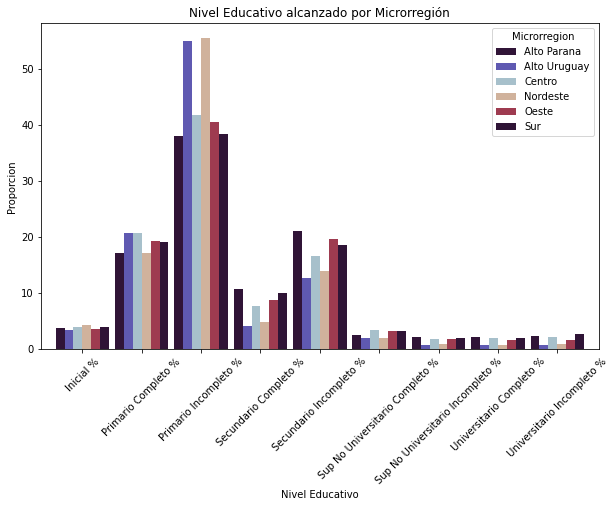

In [ ]:
escolar1 =  pd.DataFrame(educaciontotal[['Inicial %','Primario Completo %','Primario Incompleto %','Secundario Completo %','Secundario Incompleto %',
                                        'Sup No Universitario Completo %','Sup No Universitario Incompleto %','Universitario Completo %','Universitario Incompleto %']])
escolar1 = escolar1.transpose().reset_index(drop=False).rename(columns={'index':'Nivel Educativo'})

escolar1.plot(x='Nivel Educativo',
		kind='bar',
		stacked=False,
		title='Nivel Educativo alcanzado por Microrregión',
    figsize=(10,6),
    width=0.9,
    rot=45,
    colormap='twilight_shifted',
    ylabel='Proporcion')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Unrecognized location 'bottom'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


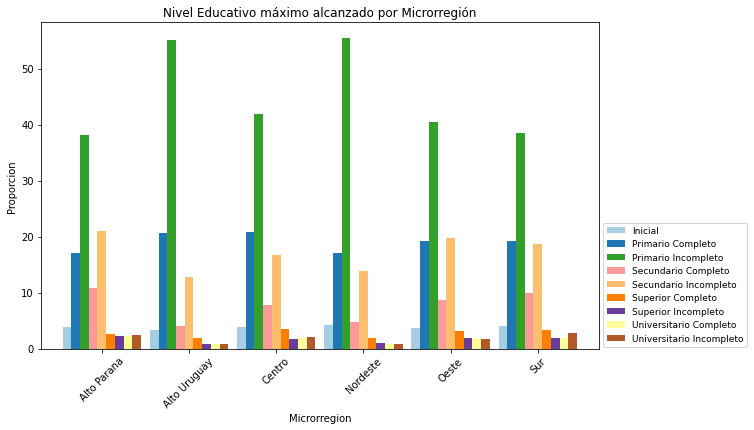

In [ ]:
escolar2 = pd.DataFrame(educaciontotal[['Inicial %','Primario Completo %','Primario Incompleto %','Secundario Completo %','Secundario Incompleto %',
                                        'Sup No Universitario Completo %','Sup No Universitario Incompleto %','Universitario Completo %','Universitario Incompleto %']])
escolar2 = escolar2.reset_index(drop=False)

fig, ax = plt.subplots()

escolar2.plot(x='Microrregion',
		kind='bar',
		stacked=False,
		title='Nivel Educativo máximo alcanzado por Microrregión',
    figsize=(10,6),
    width=0.9,
    rot=45,
    colormap='Paired',
    ylabel='Proporcion',
    ax=ax)
plt.legend(['Inicial','Primario Completo','Primario Incompleto','Secundario Completo','Secundario Incompleto','Superior Completo','Superior Incompleto',
            'Universitario Completo','Universitario Incompleto'], loc="bottom",bbox_to_anchor=(1,0.4), fontsize=9)

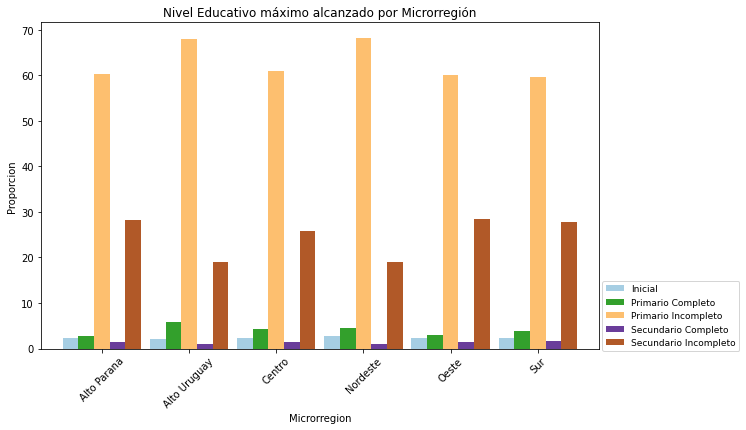

In [ ]:
escolar3 = pd.DataFrame([esctotal['Inicial %'],esctotal['Primario Completo %'],esctotal['Primario Incompleto %'],esctotal['Secundario Completo %'],esctotal['Secundario Incompleto %']])
escolar3 = escolar3.transpose().reset_index(drop=False)

fig, ax = plt.subplots()

escolar3.plot(x='Microrregion',
		kind='bar',
		stacked=False,
		title='Nivel Educativo máximo alcanzado por Microrregión',
    figsize=(10,6),
    width=0.9,
    rot=45,
    colormap='Paired',
    ylabel='Proporcion',
    ax=ax)
plt.legend(['Inicial','Primario Completo','Primario Incompleto','Secundario Completo','Secundario Incompleto'], loc="right",bbox_to_anchor=(1.26,0.1), fontsize=9)

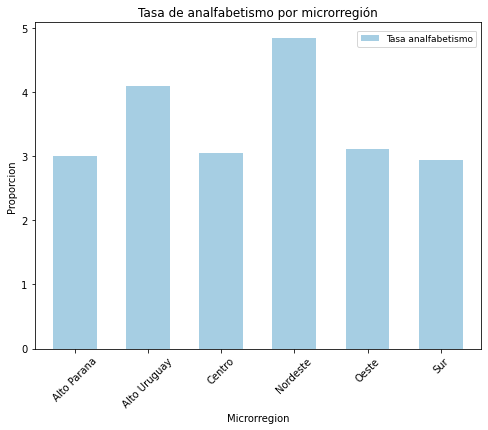

In [ ]:
escolar4 = pd.DataFrame(lye2['No Sabe Leer y Escribir %'])
escolar4 = escolar4.reset_index(drop=False)

fig, ax = plt.subplots()

escolar4.plot(x='Microrregion',
		kind='bar',
		stacked=False,
		title='Tasa de analfabetismo por microrregión',
    figsize=(8,6),
    width=0.6,
    rot=45,
    colormap='Paired',
    ylabel='Proporcion',
    ax=ax)
plt.legend(['Tasa analfabetismo'],loc="right",bbox_to_anchor=(1,0.95), fontsize=9)

### **Acceso a PC**

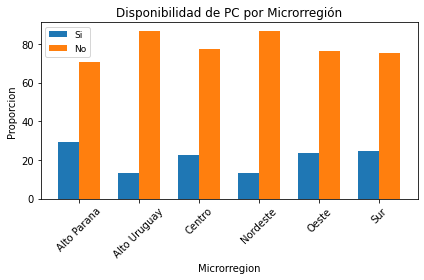

In [ ]:
import matplotlib.pyplot as plt
labels = ['Alto Parana','Alto Uruguay','Centro','Nordeste','Oeste','Sur']
tienepc = pctotal['Posee PC %']
notienepc = pctotal['No Posee PC %']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, tienepc, width, label='PC SI')
rects2 = ax.bar(x + width/2, notienepc, width, label='PC NO')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Microrregion')
ax.set_title('Disponibilidad de PC por Microrregión')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(['Si','No'],fontsize=9)
ax.set_ylabel('Proporcion')

fig.tight_layout()

plt.show()


Microrregion Disponibilidad PC  Alto Parana  ...  Oeste    Sur
0                   Posee PC %        29.34  ...  23.39  24.55
1                No Posee PC %        70.66  ...  76.61  75.45

[2 rows x 7 columns]


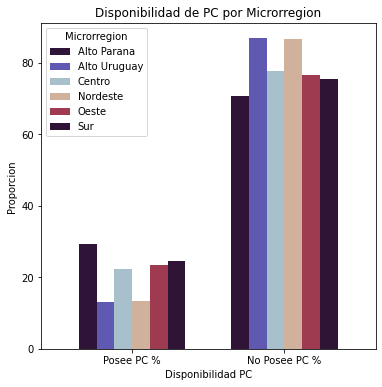

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

tienepc = pd.DataFrame(pctotal['Posee PC %'])
notienepc = pd.DataFrame(pctotal['No Posee PC %'])
pc1 = pd.DataFrame([tienepc['Posee PC %'],notienepc['No Posee PC %']]).reset_index(drop=False).rename(columns={'index':'Disponibilidad PC'})

# create data
# df = datospc

# view data
print(pc1)
  
# plot grouped bar chart
pc1.plot(x='Disponibilidad PC',
        kind='bar',
        stacked=False,
        title='Disponibilidad de PC por Microrregion',
        figsize=(6,6),
        width=0.7,
        rot=0,
        colormap='twilight_shifted',
        ylabel='Proporcion')


### **Acceso a Celular**

Microrregion Disponibilidad de Celular  Alto Parana  ...  Oeste    Sur
0                        Posee Celular        83.48  ...   81.5  82.22
1                     No Posee Celular        16.52  ...   18.5  17.78

[2 rows x 7 columns]


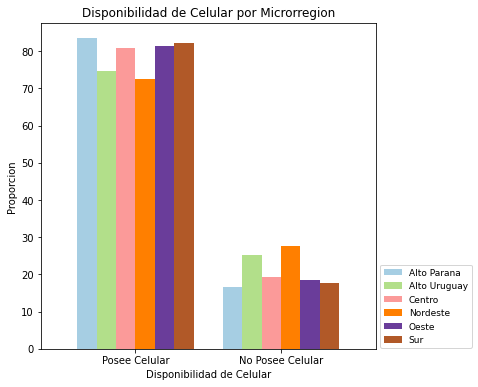

In [ ]:
celsi1 = (pd.DataFrame(celtotal['Posee Cel %'])).rename(columns={'Posee Cel %':'Posee Celular'})
celno1 = (pd.DataFrame(celtotal['No Posee Cel %'])).rename(columns={'No Posee Cel %':'No Posee Celular'})

cel1 = pd.DataFrame([celsi1['Posee Celular'],celno1['No Posee Celular']])
cel1 = cel1.reset_index(drop=False).rename(columns={'index':'Disponibilidad de Celular'})

print(cel1)

fig, ax = plt.subplots()

cel1.plot(x='Disponibilidad de Celular',
		kind='bar',
		stacked=False,
		title='Disponibilidad de Celular por Microrregion',
    figsize=(6,6),
    width=0.8,
    rot=0,
    colormap='Paired',
    ylabel='Proporcion',
    ax=ax)
plt.legend(loc="right",bbox_to_anchor=(1.3,0.13), fontsize=9)

   Microrregion  Posee Celular  No Posee Celular
0   Alto Parana          83.48             16.52
1  Alto Uruguay          74.66             25.34
2        Centro          80.83             19.17
3      Nordeste          72.46             27.53
4         Oeste          81.50             18.50
5           Sur          82.22             17.78


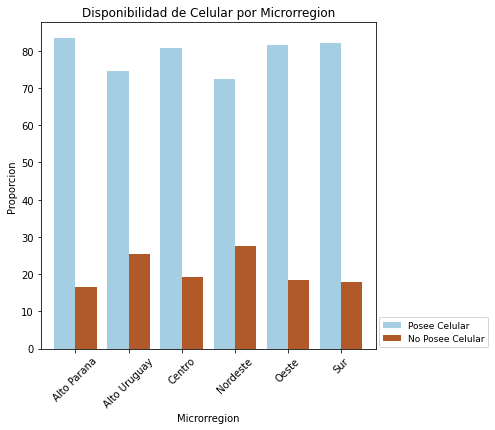

In [ ]:
cel2 = pd.DataFrame([celsi1['Posee Celular'],celno1['No Posee Celular']])
cel2 = cel2.transpose().reset_index(drop=False)
print(cel2)

fig, ax = plt.subplots()

cel2.plot(x='Microrregion',
		kind='bar',
		stacked=False,
		title='Disponibilidad de Celular por Microrregion',
    figsize=(6,6),
    width=0.8,
    rot=45,
    colormap='Paired',
    ylabel='Proporcion',
    ax=ax)
plt.legend(loc="right",bbox_to_anchor=(1.35,0.05), fontsize=9)

### **Desagüe Inodoro**

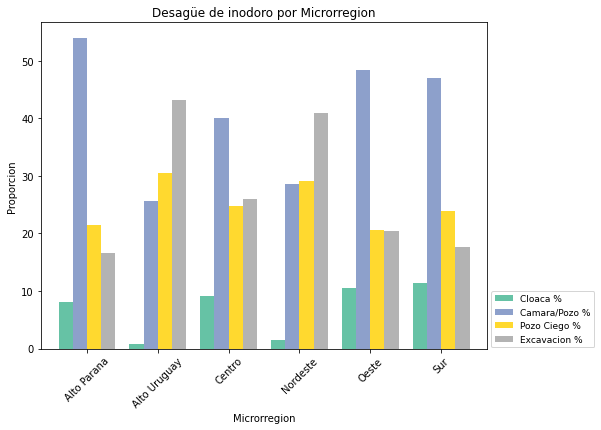

In [ ]:
des1 = pd.DataFrame(tdesague[['Cloaca %','Camara/Pozo %','Pozo Ciego %','Excavacion %']])
des1 = des1.reset_index(drop=False)

fig, ax = plt.subplots()

des1.plot(x='Microrregion',
		kind='bar',
		stacked=False,
		title='Desagüe de inodoro por Microrregion',
    figsize=(8,6),
    width=0.8,
    rot=45,
    colormap='Set2',
    ylabel='Proporcion',
    ax=ax)
plt.legend(loc="right",bbox_to_anchor=(1.25,0.09), fontsize=9)

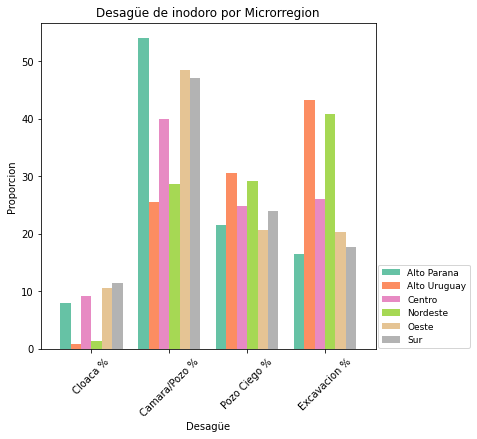

In [ ]:
des2 = pd.DataFrame(tdesague[['Cloaca %','Camara/Pozo %','Pozo Ciego %','Excavacion %']])
des2 = des2.transpose().reset_index(drop=False).rename(columns={'index':'Desagüe'})

fig, ax = plt.subplots()

des2.plot(x='Desagüe',
		kind='bar',
		stacked=False,
		title='Desagüe de inodoro por Microrregion',
    figsize=(6,6),
    width=0.8,
    rot=45,
    colormap='Set2',
    ylabel='Proporcion',
    ax=ax)
plt.legend(loc="right",bbox_to_anchor=(1.295,0.13), fontsize=9)

### **Acceso a Luz**

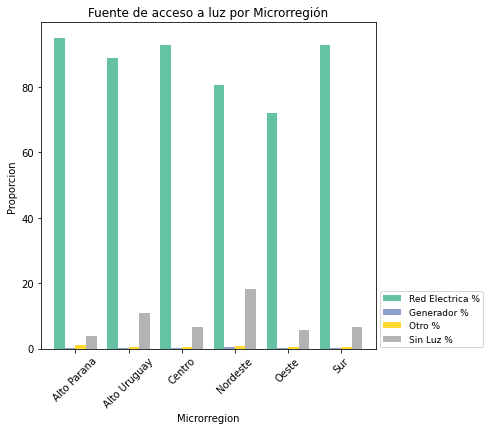

In [ ]:
grafluz1 = pd.DataFrame(luz1[['Red Electrica %','Generador %','Otro %','Sin Luz %']])
grafluz1 = grafluz1.reset_index(drop=False)

fig, ax = plt.subplots()

grafluz1.plot(x='Microrregion',
		kind='bar',
		stacked=False,
		title='Fuente de acceso a luz por Microrregión',
    figsize=(6,6),
    width=0.8,
    rot=45,
    colormap='Set2',
    ylabel='Proporcion',
    ax=ax)
plt.legend(loc="right",bbox_to_anchor=(1.335,0.09), fontsize=9)

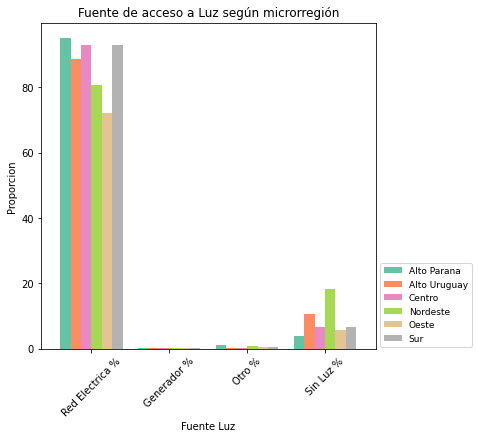

In [ ]:
grafluz2 = pd.DataFrame(luz1[['Red Electrica %','Generador %','Otro %','Sin Luz %']])
grafluz2 = grafluz2.transpose().reset_index(drop=False).rename(columns={'index':'Fuente Luz'})

fig, ax = plt.subplots()

grafluz2.plot(x='Fuente Luz',
		kind='bar',
		stacked=False,
		title='Fuente de acceso a Luz según microrregión',
    figsize=(6,6),
    width=0.8,
    rot=45,
    colormap='Set2',
    ylabel='Proporcion',
    ax=ax)
plt.legend(loc="right",bbox_to_anchor=(1.30,0.135), fontsize=9)

### **Edad**

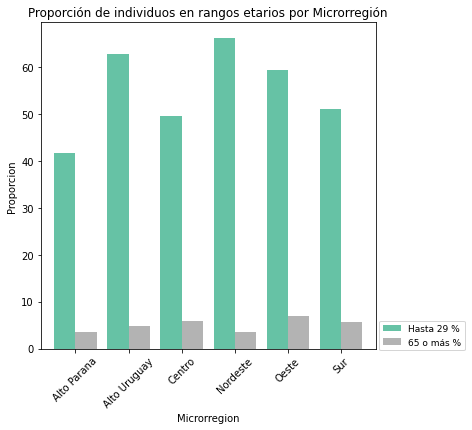

In [ ]:
df9 = pd.DataFrame(edad1[['Hasta 29 %','65 o más %']])
df9 = df9.reset_index(drop=False)

fig, ax = plt.subplots()

df9.plot(x='Microrregion',
		kind='bar',
		stacked=False,
		title='Proporción de individuos en rangos etarios por Microrregión',
    figsize=(6,6),
    width=0.8,
    rot=45,
    colormap='Set2',
    ylabel='Proporcion',
    ax=ax)
plt.legend(loc="right",bbox_to_anchor=(1.28,0.04), fontsize=9)

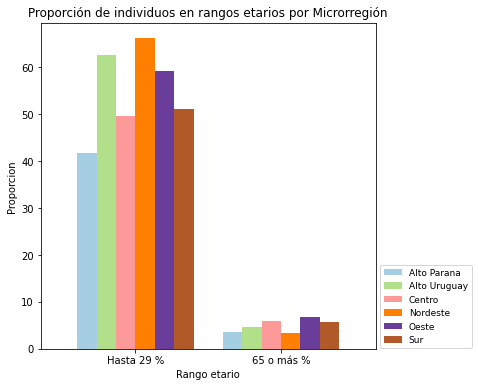

In [ ]:
df10 = pd.DataFrame(edad1[['Hasta 29 %','65 o más %']])
df10 = df10.transpose().reset_index(drop=False).rename(columns={'index':'Rango etario'})

fig, ax = plt.subplots()

df10.plot(x='Rango etario',
		kind='bar',
		stacked=False,
		title='Proporción de individuos en rangos etarios por Microrregión',
    figsize=(6,6),
    width=0.8,
    rot=0,
    colormap='Paired',
    ylabel='Proporcion',
    ax=ax)
plt.legend(loc="right",bbox_to_anchor=(1.30,0.13), fontsize=9)

### **Categoría Ocupacional**

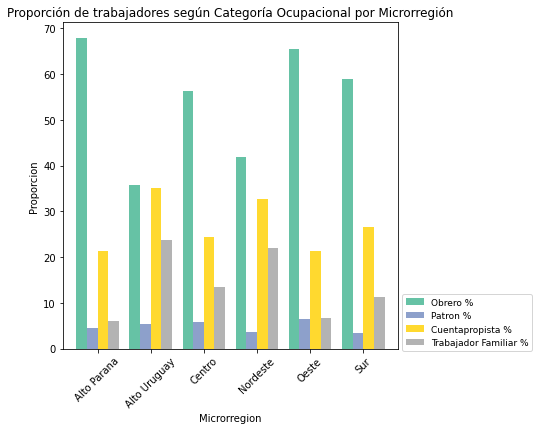

In [ ]:
df11 = pd.DataFrame(catocup1[['Obrero %','Patron %','Cuentapropista %','Trabajador Familiar %']])
df11 = df11.reset_index(drop=False)

fig, ax = plt.subplots()

df11.plot(x='Microrregion',
		kind='bar',
		stacked=False,
		title='Proporción de trabajadores según Categoría Ocupacional por Microrregión',
    figsize=(6,6),
    width=0.8,
    rot=45,
    colormap='Set2',
    ylabel='Proporcion',
    ax=ax)
plt.legend(loc="right",bbox_to_anchor=(1.415,0.08), fontsize=9)

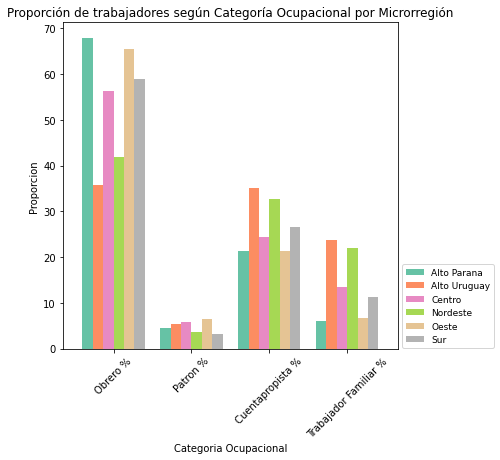

In [ ]:
df12 = pd.DataFrame(catocup1[['Obrero %','Patron %','Cuentapropista %','Trabajador Familiar %']])
df12 = df12.transpose().reset_index(drop=False).rename(columns={'index':'Categoria Ocupacional'})

fig, ax = plt.subplots()

df12.plot(x='Categoria Ocupacional',
		kind='bar',
		stacked=False,
		title='Proporción de trabajadores según Categoría Ocupacional por Microrregión',
    figsize=(6,6),
    width=0.8,
    rot=45,
    colormap='Set2',
    ylabel='Proporcion',
    ax=ax)
plt.legend(loc="right",bbox_to_anchor=(1.30,0.13), fontsize=9)

### **Condicion Actividad**

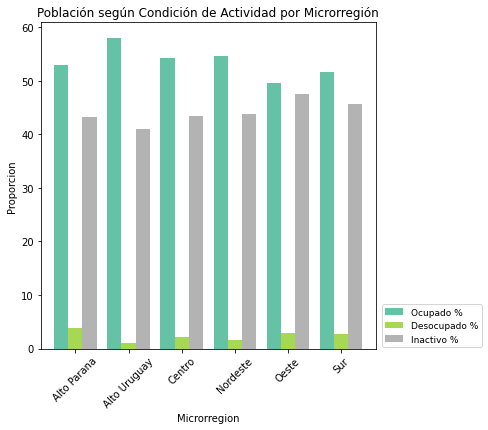

In [ ]:
df13 = pd.DataFrame(cond_actividad[['Ocupado %','Desocupado %','Inactivo %']])
df13 = df13.reset_index(drop=False)

fig, ax = plt.subplots()

df13.plot(x='Microrregion',
		kind='bar',
		stacked=False,
		title='Población según Condición de Actividad por Microrregión',
    figsize=(6,6),
    width=0.8,
    rot=45,
    colormap='Set2',
    ylabel='Proporcion',
    ax=ax)
plt.legend(loc="right",bbox_to_anchor=(1.33,0.07), fontsize=9)

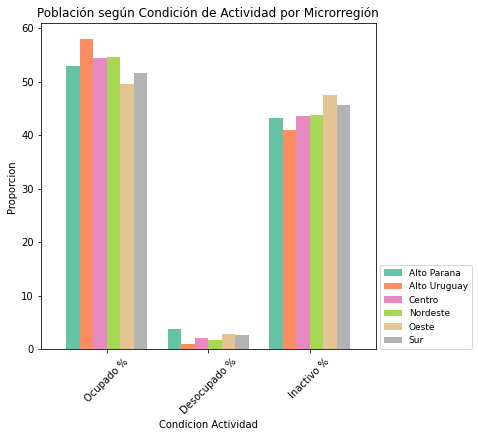

In [ ]:
df14 = pd.DataFrame(cond_actividad[['Ocupado %','Desocupado %','Inactivo %']])
df14 = df14.transpose().reset_index(drop=False).rename(columns={'index':'Condicion Actividad'})

fig, ax = plt.subplots()

df14.plot(x='Condicion Actividad',
		kind='bar',
		stacked=False,
		title='Población según Condición de Actividad por Microrregión',
    figsize=(6,6),
    width=0.8,
    rot=45,
    colormap='Set2',
    ylabel='Proporcion',
    ax=ax)
plt.legend(loc="right",bbox_to_anchor=(1.3,0.13), fontsize=9)

### **Carácter Ocupacional**

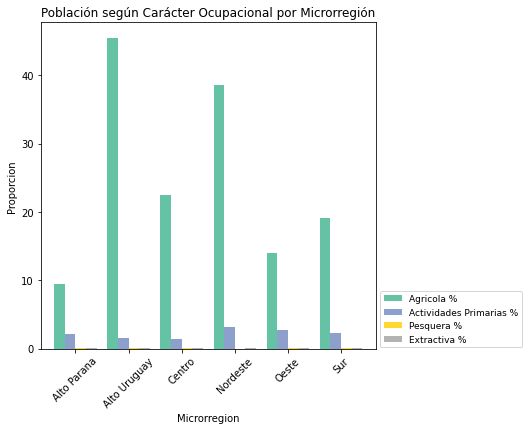

In [ ]:
df15 = pd.DataFrame(caract_ocupacional[['Agricola %','Actividades Primarias %','Pesquera %','Extractiva %']])
df15 = df15.reset_index(drop=False)

fig, ax = plt.subplots()

df15.plot(x='Microrregion',
		kind='bar',
		stacked=False,
		title='Población según Carácter Ocupacional por Microrregión',
    figsize=(6,6),
    width=0.8,
    rot=45,
    colormap='Set2',
    ylabel='Proporcion',
    ax=ax)
plt.legend(loc="right",bbox_to_anchor=(1.45,0.09), fontsize=9)

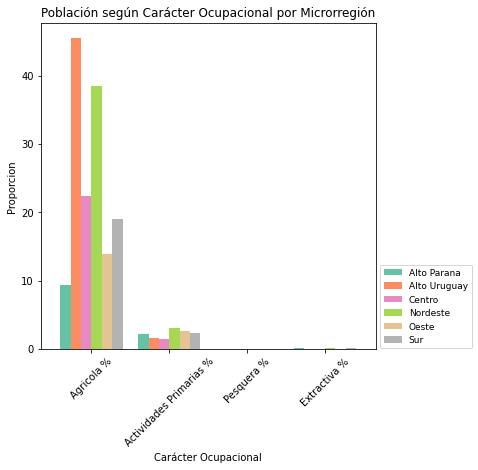

In [ ]:
df16 = pd.DataFrame(caract_ocupacional[['Agricola %','Actividades Primarias %','Pesquera %','Extractiva %']])
df16 = df16.transpose().reset_index(drop=False).rename(columns={'index':'Carácter Ocupacional'})

fig, ax = plt.subplots()

df16.plot(x='Carácter Ocupacional',
		kind='bar',
		stacked=False,
		title='Población según Carácter Ocupacional por Microrregión',
    figsize=(6,6),
    width=0.8,
    rot=45,
    colormap='Set2',
    ylabel='Proporcion',
    ax=ax)
plt.legend(loc="right",bbox_to_anchor=(1.3,0.13), fontsize=9)

### **Sector en el que trabaja**

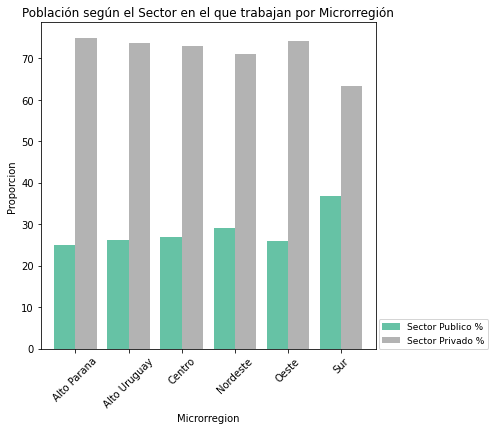

In [ ]:
df17 = pd.DataFrame(sector_ocup1[['Sector Publico %','Sector Privado %']])
df17 = df17.reset_index(drop=False)

fig, ax = plt.subplots()

df17.plot(x='Microrregion',
		kind='bar',
		stacked=False,
		title='Población según el Sector en el que trabajan por Microrregión',
    figsize=(6,6),
    width=0.8,
    rot=45,
    colormap='Set2',
    ylabel='Proporcion',
    ax=ax)
plt.legend(loc="right",bbox_to_anchor=(1.35,0.045), fontsize=9)

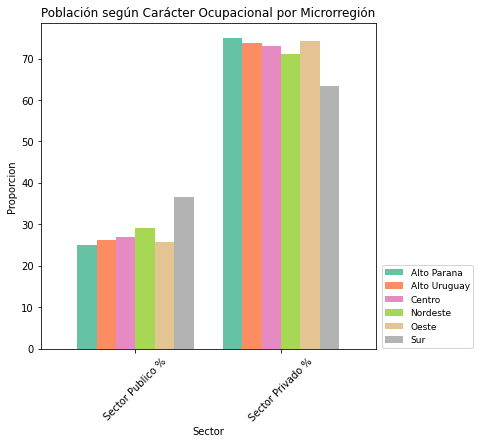

In [ ]:
df18 = pd.DataFrame(sector_ocup1[['Sector Publico %','Sector Privado %']])
df18 = df18.transpose().reset_index(drop=False).rename(columns={'index':'Sector'})

fig, ax = plt.subplots()

df18.plot(x='Sector',
		kind='bar',
		stacked=False,
		title='Población según Carácter Ocupacional por Microrregión',
    figsize=(6,6),
    width=0.8,
    rot=45,
    colormap='Set2',
    ylabel='Proporcion',
    ax=ax)
plt.legend(loc="right",bbox_to_anchor=(1.305,0.13), fontsize=9)